# Исследование продаж компьютерных игр для интернет-магазина «Стримчик»

Заказчик - интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br>
<br>В нашем распоряжении данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.  

**Цель исследования** - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
  
- Определить актуальный период для анализа
- Выявить самые популярные платформы
- Определить топовые жанры игр в разных странах
- Составить портрет пользователя в каждом регионе
- Изучить зависимость продаж от оценок пользователей и критиков
- Проверить две гипотезы:
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
  
**Ход исследования:**

 1. Обзор данных
 2. Предобработка данных
 3. Исследовательский анализ данных
 4. Составление портрета пользователя в каждом регионе
 5. Проверка гипотез
 6. Подведение итогов по результатам исследования


### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

data = pd.read_csv('datasets/games.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


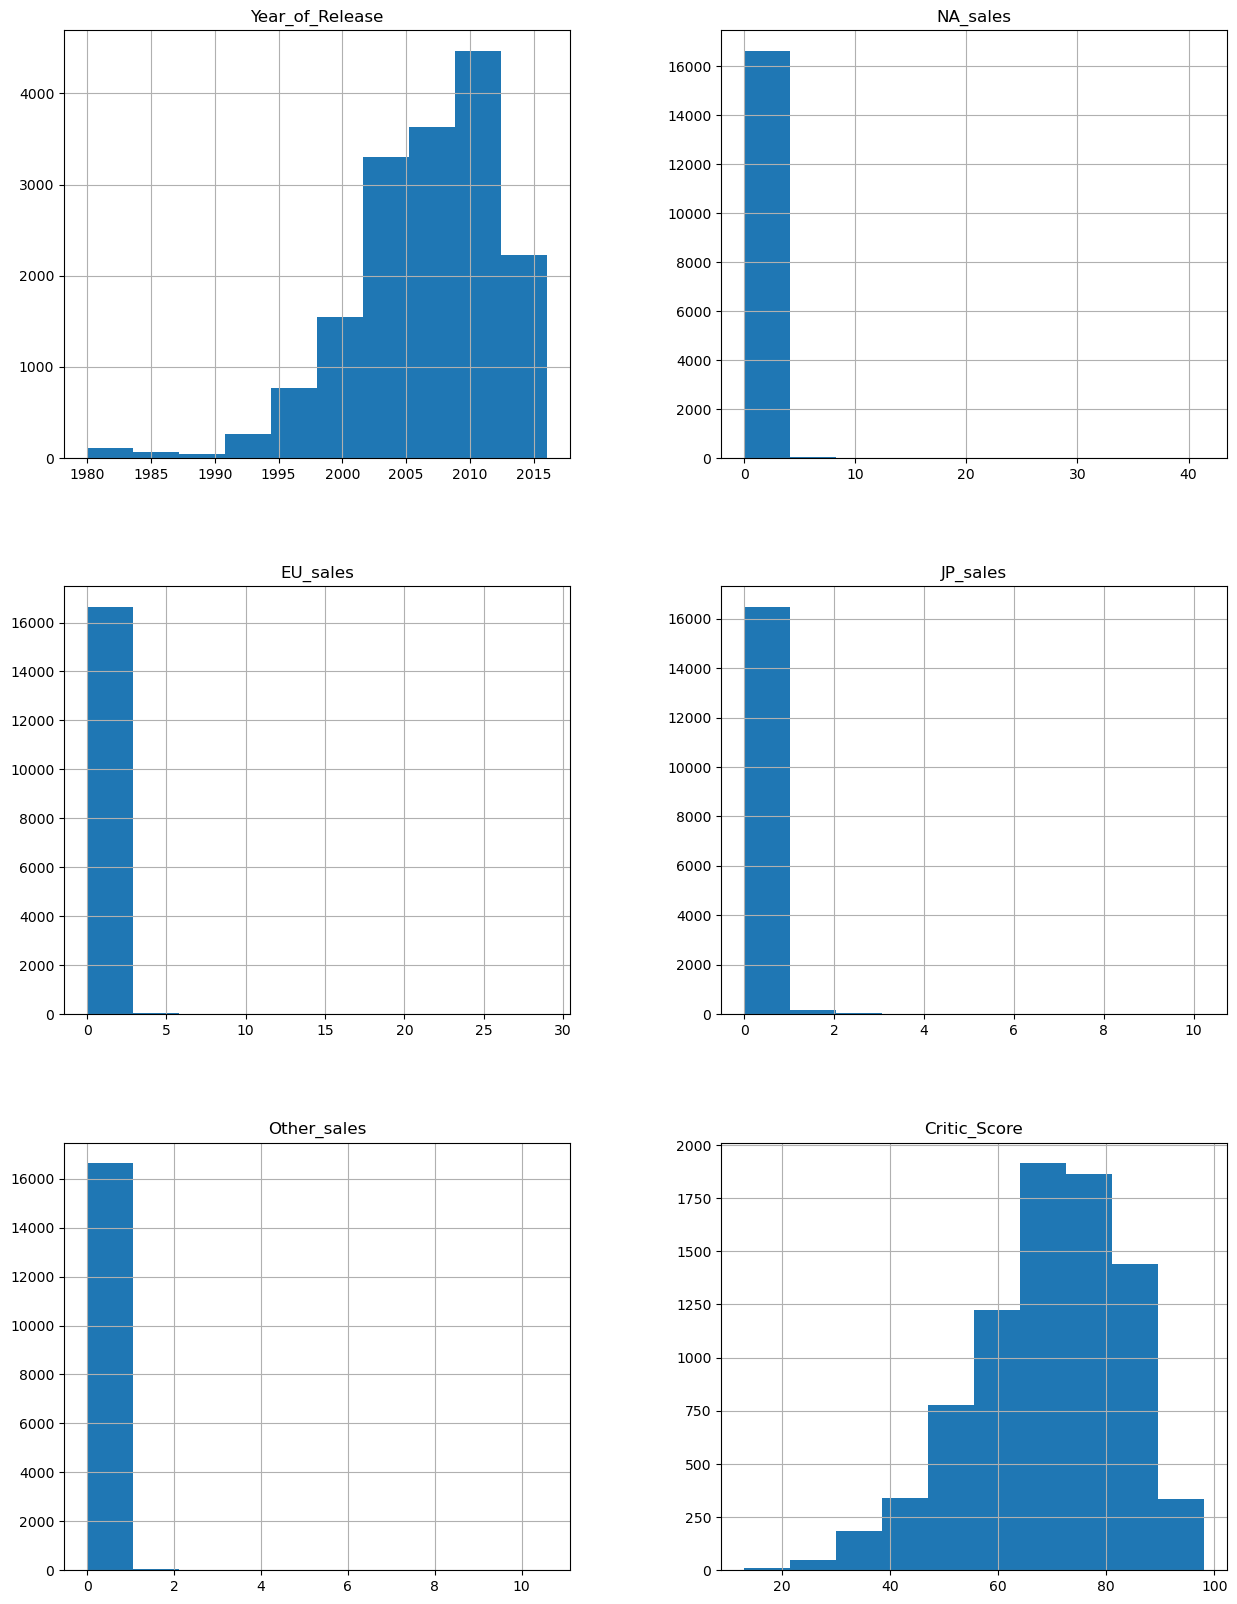

In [2]:
data.info()
display(data.head(10))
data.hist(figsize=(15, 20));

### Предобработка данных

#### Заменим названия столбцов (приведем все к нижнему регистру)

In [3]:
data.columns = data.columns.str.lower()
print('Убедимся, что названия столбцов записаны в нижнем регистре:')
display(data.columns)

Убедимся, что названия столбцов записаны в нижнем регистре:


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Преобразуем данные в нужные типы

In [4]:
display(data.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Описание столбцов:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Типы данных не подходят столбцам:
* Year_of_Release — год выпуска, данное значение не может быть дробным числом. Преодразуем в целое ('int')
* User_Score — числовое значение, преобразуем в дродное ('float')
* Все столбцы с типами данных 'float' и 'int' содержат небольшие значения, для оптимизации используемой памяти заменим их на 'float32' и 'int32' соответственно  

In [5]:
print('Уникальные значения "year_of_release":')
print()
print(data['year_of_release'].unique())
print()
print(f"Количество пропущенных значений: {data['year_of_release'].isna().sum()} шт.")

Уникальные значения "year_of_release":

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

Количество пропущенных значений: 269 шт.


В столбце Year_of_Release нет выбивающихся значений, только отсутствующие (269 значений). Преобразуем тип данных в целое ('int32'), предварительно заменив отсутствующие значения на '0'. В дальнейшем при анализе будем учитывать '0' как "неизвестный год"

In [6]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int32')

In [7]:
print(f"Количество пропущенных значений после замены: {data['year_of_release'].isna().sum()} шт.")
print('Тип данных:', data['year_of_release'].dtypes)

Количество пропущенных значений после замены: 0 шт.
Тип данных: int32


In [8]:
print('Уникальные значения "user_score":')
print()
print(data['user_score'].unique())

Уникальные значения "user_score":

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


* В столбце User_Score есть выбивающееся значение 'tbd', эта аббревиатура расшифровывается - To Be Determined, то есть "Будет определено", соответственно рейтинг еще не назначен
* Преобразуем тип данных в дробное ('float32')

In [9]:
print(f"Количество значений 'tbd': {data[data['user_score']=='tbd']['user_score'].count()} шт.")
print(f"Процент значений 'tbd': {data[data['user_score']=='tbd']['user_score'].count()/len(data['user_score'])*100 :.1f} %")

Количество значений 'tbd': 2424 шт.
Процент значений 'tbd': 14.5 %


Проверим количество значений, равных 0

In [10]:
print(f"Количество значений '0': {data[data['user_score']=='0']['user_score'].count()} шт.")
data[data['user_score']=='0']

Количество значений '0': 1 шт.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


Так как значений, равных нулю, всего одно, то можно считать его как 'tbd'. Для перевода столбца в численный формат присвоим всем строкам с 'user_score' = 'tbd' значение '0'. В дальнейшем при анализе будем учитывать '0' в рейтинге как "отсутствие оценки"

In [11]:
data['user_score'] = data['user_score'].replace('tbd', '0')
print(f"Количество значений 'tbd': {data[data['user_score']=='tbd']['user_score'].count()} шт.")
data['user_score'] = data['user_score'].astype('float32')
print('Тип данных:', data['user_score'].dtypes)

Количество значений 'tbd': 0 шт.
Тип данных: float32


In [12]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']] = data[
    ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']].astype('float32')
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float32
eu_sales           float32
jp_sales           float32
other_sales        float32
critic_score       float32
user_score         float32
rating              object
dtype: object

####  Обработаем пропуски

In [13]:
print('Количество пропусков по столбцам:')
print()

for col in data.columns:
    nmv = data[col].isna().sum()
    pmv = nmv/len(data)
    print('{} - {} шт. - {}%'.format(col, nmv, round(pmv*100, 2)))

Количество пропусков по столбцам:

name - 2 шт. - 0.01%
platform - 0 шт. - 0.0%
year_of_release - 0 шт. - 0.0%
genre - 2 шт. - 0.01%
na_sales - 0 шт. - 0.0%
eu_sales - 0 шт. - 0.0%
jp_sales - 0 шт. - 0.0%
other_sales - 0 шт. - 0.0%
critic_score - 8578 шт. - 51.32%
user_score - 6701 шт. - 40.09%
rating - 6766 шт. - 40.48%


Проверим два пропущенных значения в колонках 'name' и 'genre'

In [14]:
display(data[data['name'].isna()])
print()
display(data[data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По обоим столбцам пропуски в одних и тех же строках. Строк всего две (0.01%). Вероятная причина пропусков — отсутствие данных (год указан 1993), либо ошибка заполнения. Удаление пустых строк не может существенно повлиять на результаты исследования

In [15]:
data = data.dropna(subset=['name'])
print(f"Пропущенные значения в столбце 'name' после удаления: {data['name'].isna().sum()}")
print(f"Пропущенные значения в столбце 'genre' после удаления: {data['genre'].isna().sum()}")

Пропущенные значения в столбце 'name' после удаления: 0
Пропущенные значения в столбце 'genre' после удаления: 0


Проверим пропущенные значения в столбце 'critic_score'

In [16]:
display(data[data['critic_score'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.930000,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.050000,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.000000,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.010000,0.00,0.00,0.00,NaN,NaN,NaN


В данном случае мы не можем заменить пропущенные значения без искажения данных. Вероятнее всего отсутствие данных означает отсутствие оценки. Заменим пропуски на '0'. В дальнейшем при анализе будем учитывать '0' в рейтинге как "отсутствие оценки"

In [17]:
print(f"Количество пропущенных значений: {data['critic_score'].isna().sum()} шт.")
print(f"Количество значений '0': {data[data['critic_score']==0]['critic_score'].count()} шт.")

Количество пропущенных значений: 8576 шт.
Количество значений '0': 0 шт.


In [18]:
data['critic_score'] = data['critic_score'].fillna(0)
    
print(f"Количество пропущенных значений: {data['critic_score'].isna().sum()} шт.")
print(f"Количество значений '0': {data[data['critic_score']==0]['critic_score'].count()} шт.")

Количество пропущенных значений: 0 шт.
Количество значений '0': 8576 шт.


Проверим пропущенные значения в столбце 'user_score'

In [19]:
display(data[data['user_score'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.58,6.81,0.77,0.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.89,10.22,1.00,0.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,0.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.930000,0.63,0.28,0.47,0.0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.050000,10.95,1.93,2.74,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.00,0.01,0.00,0.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.000000,0.01,0.00,0.00,0.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.00,0.01,0.00,0.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.010000,0.00,0.00,0.00,0.0,NaN,NaN


Как и в предыдущем случае мы не можем заменить пропущенные значения без искажения данных. Вероятнее всего отсутствие данных означает отсутствие оценки. Заменим пропуски на '0'. В дальнейшем при анализе будем учитывать '0' в рейтинге как "отсутствие оценки"

In [20]:
print(f"Количество пропущенных значений: {data['user_score'].isna().sum()} шт.")
print(f"Количество значений '0': {data[data['user_score']==0]['user_score'].count()} шт.")

Количество пропущенных значений: 6699 шт.
Количество значений '0': 2425 шт.


In [21]:
data['user_score'] = data['user_score'].fillna(0)
                
print(f"Количество пропущенных значений: {data['user_score'].isna().sum()} шт.")
print(f"Количество значений '0': {data[data['user_score']==0]['user_score'].count()} шт.")

Количество пропущенных значений: 0 шт.
Количество значений '0': 9124 шт.


Проверим пропущенные значения в столбце 'rating'

In [22]:
display(data[data['rating'].isna()])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.58,6.81,0.77,0.0,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.89,10.22,1.00,0.0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,0.0,0.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.930000,0.63,0.28,0.47,0.0,0.0,NaN
10,Nintendogs,DS,2005,Simulation,9.050000,10.95,1.93,2.74,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.00,0.01,0.00,0.0,0.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.000000,0.01,0.00,0.00,0.0,0.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.00,0.01,0.00,0.0,0.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.010000,0.00,0.00,0.00,0.0,0.0,NaN


Рейтинговый совет по развлекательному программному обеспечению (ESRB) - это саморегулируемая организация, которая присваивает потребительским видеоиграм в Соединенных Штатах и Канаде рейтинги по возрасту и содержанию. ESRB была создана в 1994 году.<br> Вероятнее всего пропуски в данном столбце связаны с тем, что до 1994 года, а так же играм вне Соединенных Штатов и Канады рейтинг не был присвоен<br>
Заменим все пропущенные знаения на 'unknown'

In [23]:
data['rating'] = data['rating'].fillna('unknown')
print(f"Количество пропущенных значений: {data['rating'].isna().sum()} шт.")

Количество пропущенных значений: 0 шт.


In [24]:
print('Количество пропусков по столбцам:')
print()

for col in data.columns:
    nmv = data[col].isna().sum()
    pmv = nmv/len(data)
    print('{} - {} шт. - {}%'.format(col, nmv, round(pmv*100, 2)))

Количество пропусков по столбцам:

name - 0 шт. - 0.0%
platform - 0 шт. - 0.0%
year_of_release - 0 шт. - 0.0%
genre - 0 шт. - 0.0%
na_sales - 0 шт. - 0.0%
eu_sales - 0 шт. - 0.0%
jp_sales - 0 шт. - 0.0%
other_sales - 0 шт. - 0.0%
critic_score - 0 шт. - 0.0%
user_score - 0 шт. - 0.0%
rating - 0 шт. - 0.0%


Проверим на наличие аномалий года выпуска по платформам

In [25]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Года выпуска игровых платформ:

* Wii - 2006

In [26]:
plat = 'Wii'
year = 2006
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]

Количество аномалий года выпуска: 34
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
678,LEGO Indiana Jones: The Original Adventures,Wii,0,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,0,Shooter,1.17,0.84,0.0,0.23,69.0,6.7,T
805,Rock Band,Wii,0,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1609,LEGO Harry Potter: Years 5-7,Wii,0,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+


Найдем год выхода игры для весомых строк на платформе Wii:
* LEGO Batman: The Videogame - 2008
* LEGO Indiana Jones: The Original Adventures - 2008
* Call of Duty 3 - 2006
* Rock Band - 2007
* LEGO Harry Potter: Years 5-7 - 2011

Заменим год релиза на найденые значения

In [27]:
data.loc[(data['name']=='LEGO Batman: The Videogame') & (data['platform']==plat), 'year_of_release'] = 2008
data.loc[(data['name']=='LEGO Indiana Jones: The Original Adventures') & (data['platform']==plat), 'year_of_release'] = 2008
data.loc[(data['name']=='Call of Duty 3') & (data['platform']==plat), 'year_of_release'] = 2006
data.loc[(data['name']=='Rock Band') & (data['platform']==plat), 'year_of_release'] = 2007
data.loc[(data['name']=='LEGO Harry Potter: Years 5-7') & (data['platform']==plat), 'year_of_release'] = 2011

* NES - 1983

In [28]:
plat = 'NES'
year = 1983
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* GB - 1989

In [29]:
plat = 'GB'
year = 1989
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]

Количество аномалий года выпуска: 2
Количество аномалий года выпуска, исключая "неизвестный год": 1

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1340,Disney's DuckTales,GB,1988,Platform,0.82,0.23,0.35,0.03,0.0,0.0,unknown
2010,Donkey Kong Land III,GB,0,Platform,0.68,0.31,0.00,0.04,0.0,0.0,unknown


Найдем год выхода игры для весомых строк на платформе GB:
* Disney's DuckTales - 1989
* Donkey Kong Land III - 1997

Заменим год релиза на найденые значения

In [30]:
data.loc[(data['name']=="Disney's DuckTales") & (data['platform']==plat), 'year_of_release'] = 1989
data.loc[(data['name']=='Donkey Kong Land III') & (data['platform']==plat), 'year_of_release'] = 1997

* DS - 2004

In [31]:
plat = 'DS'
year = 2004
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())

print('Строки с "неизвестным годом", но с весомыми данными:', data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]['name'].count())
print()
print('Аномалия года выпуска, исключая "неизвестный год":')
data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]

Количество аномалий года выпуска: 31
Количество аномалий года выпуска, исключая "неизвестный год": 1
Строки с "неизвестным годом", но с весомыми данными: 0

Аномалия года выпуска, исключая "неизвестный год":


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.0,0.0,unknown


Найдем год выхода игры для аномалии на платформе DS:
* Strongest Tokyo University Shogi DS - 2010

Заменим год релиза на найденые значения

In [32]:
data.loc[(data['name']=='Strongest Tokyo University Shogi DS') & (data['platform']==plat), 'year_of_release'] = 2010

* X360 - 2005

In [33]:
plat = 'X360'
year = 2005
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]

Количество аномалий года выпуска: 30
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,0,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T


Найдем год выхода игры для весомых строк на платформе X360:
* Rock Band - 2007

Заменим год релиза на найденые значения

In [34]:
data.loc[(data['name']=='Rock Band') & (data['platform']==plat), 'year_of_release'] = 2007

* PS3 - 2006

In [35]:
plat = 'PS3'
year = 2006
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]

Количество аномалий года выпуска: 25
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T


Найдем год выхода игры для весомых строк на платформе PS3:
* Rock Band - 2007

Заменим год релиза на найденые значения

In [36]:
data.loc[(data['name']=='Rock Band') & (data['platform']==plat), 'year_of_release'] = 2007

* PS2 - 2000

In [37]:
plat = 'PS2'
year = 2000
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]

Количество аномалий года выпуска: 34
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,0.0,0.0,unknown
1650,NASCAR Thunder 2003,PS2,0,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
1840,Rock Band,PS2,0,Misc,0.71,0.06,0.00,0.35,82.0,6.8,T


Найдем год выхода игры для весомых строк на платформе PS2:
* Madden NFL 2004 - 2003
* FIFA Soccer 2004 - 2003
* wwe Smackdown vs. Raw 2006 - 2005
* NASCAR Thunder 2003 - 2002
* Rock Band - 2007

Заменим год релиза на найденые значения

In [38]:
data.loc[(data['name']=='Madden NFL 2004') & (data['platform']==plat), 'year_of_release'] = 2003
data.loc[(data['name']=='FIFA Soccer 2004') & (data['platform']==plat), 'year_of_release'] = 2003
data.loc[(data['name']=='wwe Smackdown vs. Raw 2006') & (data['platform']==plat), 'year_of_release'] = 2005
data.loc[(data['name']=='NASCAR Thunder 2003') & (data['platform']==plat), 'year_of_release'] = 2002
data.loc[(data['name']=='Rock Band') & (data['platform']==plat), 'year_of_release'] = 2007

* SNES - 1990

In [39]:
plat = 'SNES'
year = 1990
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* GBA - 2001

In [40]:
plat = 'GBA'
year = 2001
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":', data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
display(data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)])
print()
print('Аномалия года выпуска, исключая "неизвестный год":')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (data['year_of_release'] != 0)]

Количество аномалий года выпуска: 12
Количество аномалий года выпуска, исключая "неизвестный год": 1

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,0.0,E



Аномалия года выпуска, исключая "неизвестный год":


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12300,ESPN Winter X-Games: Snowboarding 2002,GBA,2000,Sports,0.05,0.02,0.0,0.0,0.0,0.0,unknown


Найдем год выхода игры для весомых строк на платформе GBA:
* Frogger's Adventures: Temple of the Frog -  2001
* ESPN Winter X-Games: Snowboarding 2002 - 2001

Заменим год релиза на найденые значения

In [41]:
data.loc[(data['name']=="Frogger's Adventures: Temple of the Frog") & (data['platform']==plat), 'year_of_release'] = 2001
data.loc[(data['name']=='ESPN Winter X-Games: Snowboarding 2002') & (data['platform']==plat), 'year_of_release'] = 2001

* PS4 - 2013

In [42]:
plat = 'PS4'
year = 2013
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* 3DS - 2010

In [43]:
plat = '3DS'
year = 2010
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:', data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]['name'].count())


Количество аномалий года выпуска: 8
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными: 0


* N64 - 1996

In [44]:
plat = 'N64'
year = 1996
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:', data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]['name'].count())

Количество аномалий года выпуска: 3
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными: 0


* PS - 1994

In [45]:
plat = 'PS'
year = 1994
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]

Количество аномалий года выпуска: 7
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,Triple Play 99,PS,0,Sports,0.81,0.55,0.0,0.10,0.0,0.0,unknown
1984,Legacy of Kain: Soul Reaver,PS,0,Action,0.58,0.40,0.0,0.07,91.0,9.0,T


Найдем год выхода игры для весомых строк на платформе PS:
* Triple Play 99 - 1998
* Legacy of Kain: Soul Reaver - 1999

Заменим год релиза на найденые значения

In [46]:
data.loc[(data['name']=='Triple Play 99') & (data['platform']==plat), 'year_of_release'] = 1998
data.loc[(data['name']=='Legacy of Kain: Soul Reaver') & (data['platform']==plat), 'year_of_release'] = 1999

* XB - 2001

In [47]:
plat = 'XB'
year = 2001
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":', data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
display(data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)])
print()
print('Аномалия года выпуска, исключая "неизвестный год":')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (data['year_of_release'] != 0)]

Количество аномалий года выпуска: 22
Количество аномалий года выпуска, исключая "неизвестный год": 1

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1699,Hitman 2: Silent Assassin,XB,0,Action,0.76,0.38,0.0,0.05,84.0,8.0,M



Аномалия года выпуска, исключая "неизвестный год":


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2076,NFL Fever 2002,XB,2000,Sports,0.74,0.21,0.0,0.04,79.0,8.5,E


Найдем год выхода игры для весомых строк на платформе XB:
* Hitman 2: Silent Assassin - 2002
* NFL Fever 2002 - 2001

Заменим год релиза на найденые значения

In [48]:
data.loc[(data['name']=='Hitman 2: Silent Assassin') & (data['platform']==plat), 'year_of_release'] = 2002
data.loc[(data['name']=='NFL Fever 2002') & (data['platform']==plat), 'year_of_release'] = 2001

* PC - Первая игра на ПК появилась в 1962 г., первые крупные издатели видеоигр появились в 1980 г. 

In [49]:
plat = 'PC'
year = 1980
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]

Количество аномалий года выпуска: 17
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1131,Call of Duty: Black Ops,PC,0,Shooter,0.58,0.81,0.0,0.23,81.0,5.2,M


Найдем год выхода игры для весомых строк на платформе PC:
* Call of Duty: Black Ops - 2010

Заменим год релиза на найденые значения

In [50]:
data.loc[(data['name']=='Call of Duty: Black Ops') & (data['platform']==plat), 'year_of_release'] = 2010

* 2600 - 1977

In [51]:
plat = '2600'
year = 1977
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]

Количество аномалий года выпуска: 17
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.0,0.03,0.0,0.0,unknown
1506,Adventure,2600,0,Adventure,1.21,0.08,0.0,0.01,0.0,0.0,unknown
1585,Combat,2600,0,Action,1.17,0.07,0.0,0.01,0.0,0.0,unknown


Найдем год выхода игры для весомых строк на платформе 2600:
* Space Invaders - 1978
* Adventure - 1979
* Combat - 1977

Заменим год релиза на найденые значения

In [52]:
# Возможно стоит совсем убрать из набора данных, так как года меньше 1980
data.loc[(data['name']=='Space Invaders') & (data['platform']==plat), 'year_of_release'] = 1978
data.loc[(data['name']=='Adventure') & (data['platform']==plat), 'year_of_release'] = 1979
data.loc[(data['name']=='Combat') & (data['platform']==plat), 'year_of_release'] = 1977

* PSP - 2004

In [53]:
plat = 'PSP'
year = 2004
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:')
data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]

Количество аномалий года выпуска: 16
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1538,LEGO Batman: The Videogame,PSP,0,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+


Найдем год выхода игры для весомых строк на платформе PSP:
* LEGO Batman: The Videogame - 2008

Заменим год релиза на найденые значения

In [54]:
data.loc[(data['name']=='LEGO Batman: The Videogame') & (data['platform']==plat), 'year_of_release'] = 2008

* XOne - 2013

In [55]:
plat = 'XOne'
year = 2013
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* WiiU - 2011

In [56]:
plat = 'WiiU'
year = 2011
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* GC - 2001

In [57]:
plat = 'GC'
year = 2001
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:', data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]['name'].count())

Количество аномалий года выпуска: 14
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными: 0


* GEN - 1988

In [58]:
plat = 'GEN'
year = 1988
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* DC (SEGA Dreamcast) - 1998

In [59]:
plat = 'DC'
year = 1998
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* PSV - 2011

In [60]:
plat = 'PSV'
year = 2011
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())
print('Количество аномалий года выпуска, исключая "неизвестный год":',data[(data['platform'] == plat) & (
    data['year_of_release'] < year) & (data['year_of_release'] != 0)]['name'].count())
print()
print('Строки с "неизвестным годом", но с весомыми данными:', data[(data['platform'] == plat) & (data['year_of_release'] < year) & (
    data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] > 1)]['name'].count())

Количество аномалий года выпуска: 1
Количество аномалий года выпуска, исключая "неизвестный год": 0

Строки с "неизвестным годом", но с весомыми данными: 0


* SAT - 1994

In [61]:
plat = 'SAT'
year = 1994
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* SCD (Sega Mega-CD) - 1991

In [62]:
plat = 'SCD'
year = 1991
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* WS - 1999

In [63]:
plat = 'WS'
year = 1999
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* NG (Neo-Geo) - 1990

In [64]:
plat = 'NG'
year = 1990
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* TG16 - 1987

In [65]:
plat = 'TG16'
year = 1987
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* 3DO - 1993

In [66]:
plat = '3DO'
year = 1993
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* GG (Sega Game Gear) - 1990

In [67]:
plat = 'GG'
year = 1990
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


* PCFX - 1994

In [68]:
plat = 'PCFX'
year = 1994
print('Количество аномалий года выпуска:', data[(data['platform'] == plat) & (data['year_of_release'] < year)]['name'].count())

Количество аномалий года выпуска: 0


Проверим наличие явных дубликатов

In [69]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [70]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы <a id='game_count'></a>

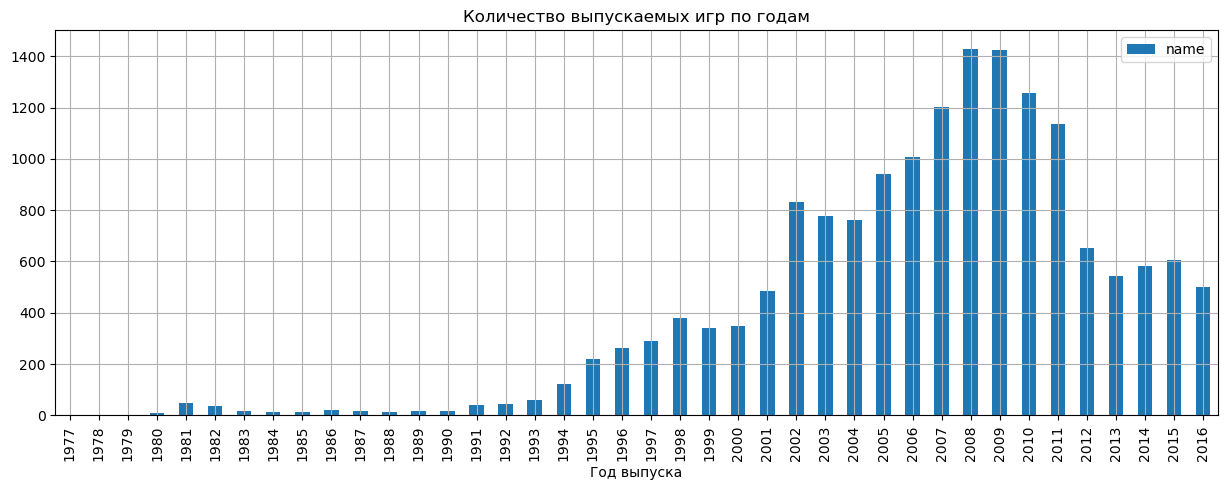

In [71]:
data[data['year_of_release']!=0].pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar',
    title='Количество выпускаемых игр по годам', grid=True, xlabel='Год выпуска', figsize=(15,5));

Наибольшее количество игр было выпущено с 2007 по 2011 года. Самый пик 2008 и 2009 года

#### Посмотрим, как менялись продажи по платформам <a id='sales_platform'></a>

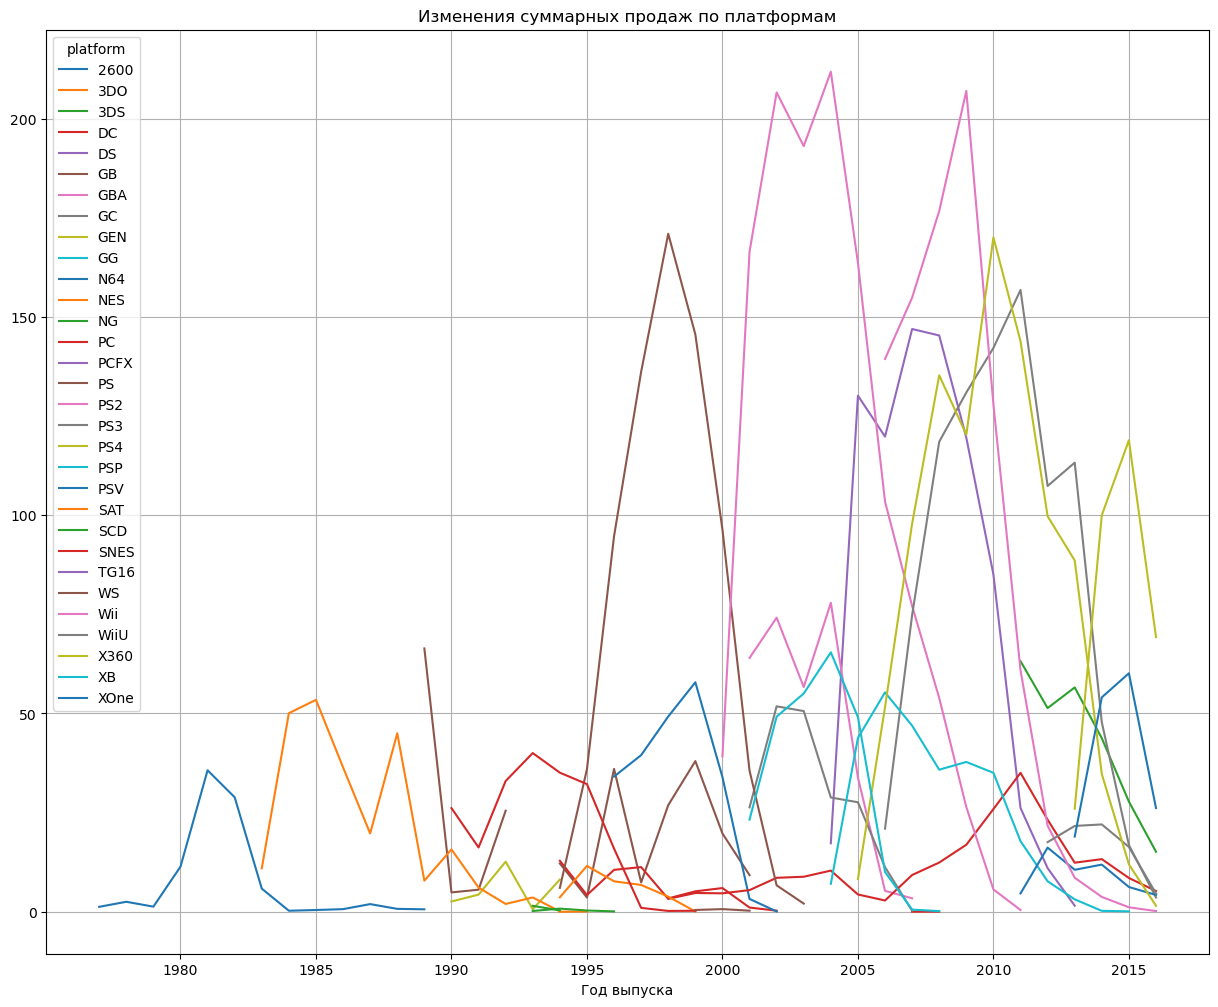

In [72]:
data[data['year_of_release']!=0].pivot_table(
    index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(
    kind='line', title='Изменения суммарных продаж по платформам', grid=True, xlabel='Год выпуска', figsize=(15,12));

Выберем платформы с наибольшими суммарными продажами <a id='sales_platform_max'></a>

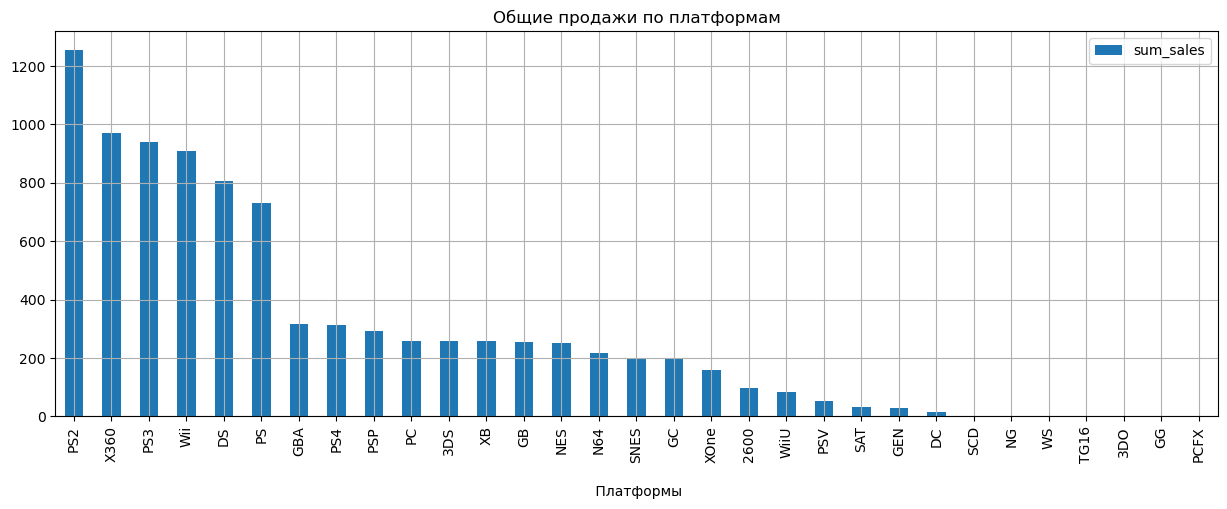

In [73]:
data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).plot(
    kind='bar', linewidth=2, title='Общие продажи по платформам', grid=True, xlabel='\n Платформы', figsize=(15,5));

Судя по графику 6 игровых платформ имеют наибольшие суммарные продажи. Построим распределение по годам

In [74]:
platform_top6 = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False).head(6)
print('Топ-6 платформ по суммарным продажам:')
display(platform_top6)

Топ-6 платформ по суммарным продажам:


,sum_sales
platform,
PS2,1255.770020
X360,971.419983
PS3,939.649963
Wii,907.510010
DS,806.119995
PS,730.859985


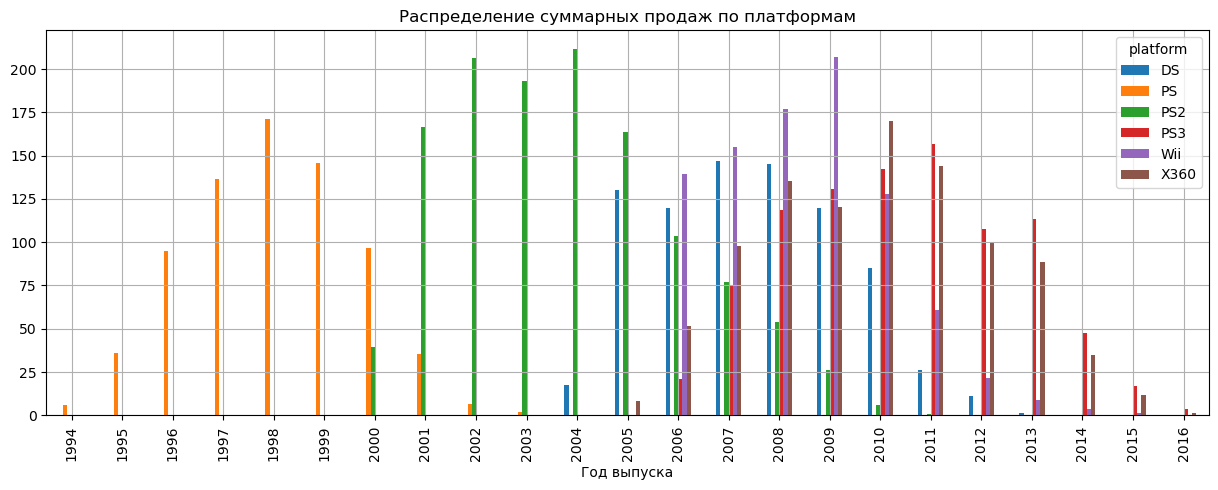

In [75]:
data[(data['year_of_release']!=0) & (data['platform'].isin(platform_top6.index))].pivot_table(
    index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(
    kind='bar', title='Распределение суммарных продаж по платформам', grid=True, xlabel='Год выпуска', figsize=(15,5));

Найдем за какой характерный срок появляются новые и исчезают старые платформы <a id='live_platform'></a>

In [76]:
year_count = []
for i in data['platform'].unique():
    a = len(data.loc[(data['platform']==i) & (data['year_of_release']!=0), 'year_of_release'].unique())
    year_count.append(a)
    print(i, a)
print()
print(f'Средняя продолжительность "жизни" платформы: {round(sum(year_count)/len(year_count))} лет')
print()
year_count_top6 = []
for i in data['platform'].unique():
    a = len(data.loc[(data['platform'].isin(platform_top6.index)) & (data['platform']==i) & (
        data['year_of_release']!=0), 'year_of_release'].unique())
    if a != 0:
        year_count_top6.append(a)
        print(i, a)
print()
print(f'Средняя продолжительность "жизни" популярных платформ: {round(sum(year_count_top6)/len(year_count_top6))} лет')

Wii 11
NES 12
GB 12
DS 10
X360 12
PS3 11
PS2 12
SNES 10
GBA 7
PS4 4
3DS 6
N64 7
PS 10
XB 8
PC 26
2600 13
PSP 12
XOne 4
WiiU 5
GC 7
GEN 5
DC 7
PSV 6
SAT 6
SCD 2
WS 3
NG 4
TG16 1
3DO 2
GG 1
PCFX 1

Средняя продолжительность "жизни" платформы: 8 лет

Wii 11
DS 10
X360 12
PS3 11
PS2 12
PS 10

Средняя продолжительность "жизни" популярных платформ: 11 лет


#### Проверим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ <a id='top3_platform'></a>
Основной фактор выбора данных — эти данные помогут построить прогноз на 2017 год. По результатам исследования предыдущих вопросов определим актуальный период с 2014 по 2016 года. Возьмем данные за соответствующий актуальный период. 

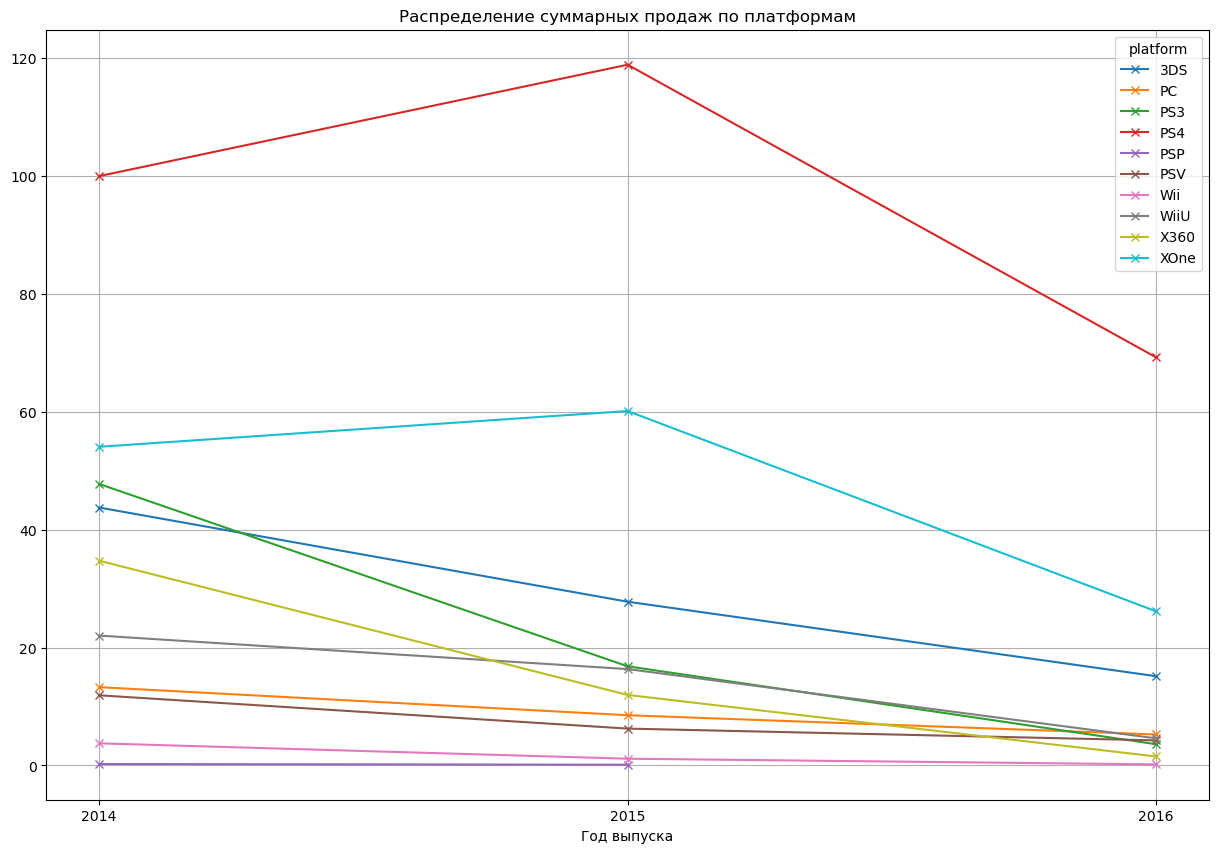

In [77]:
data[data['year_of_release']>=2014].pivot_table(
    index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(
    kind='line', title='Распределение суммарных продаж по платформам', grid=True, xlabel='Год выпуска', figsize=(15,10), 
    style='x-', xticks=([2014,2015,2016]));

Судя по графику продажи на всех платформах падают. Найдем топ-3 платформ по продажам

In [78]:
platform_top3 = data[data['year_of_release']>=2014].pivot_table(
    index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(3)
print('Топ-3 платформ по суммарным продажам:')
display(platform_top3)

Топ-3 платформ по суммарным продажам:


,sum_sales
platform,
PS4,288.149994
XOne,140.360001
3DS,86.680000


#### Проверим сколько времени топ-3 платформ будут держаться в тренде, исходя из средней продолжительности "жизни" популярных платформ (11 лет) и подходят ли они для планирования на 2017 год <a id='live_platform_top3'></a>

In [79]:
plan_year = 2017
top_live = round(sum(year_count_top6)/len(year_count_top6))
top3_live = data[(data['year_of_release'] != 0) & (data['platform'].isin(platform_top3.index))].groupby(
    by='platform')['year_of_release'].min() + top_live
for i in top3_live.index:
    if top3_live[i] > plan_year:
        print(f'Платформа подходит для прогноза на {plan_year} год \n'
        f'Предположительный год окончания "жизни" платформы "{i}" - {top3_live[i]} \n')
    else:
        print(f'Платформа не подходит для прогноза на {plan_year} год \n'
        f'Предположительный год окончания "жизни" платформы "{i}" - {top3_live[i]} \n')

Платформа подходит для прогноза на 2017 год 
Предположительный год окончания "жизни" платформы "3DS" - 2022 

Платформа подходит для прогноза на 2017 год 
Предположительный год окончания "жизни" платформы "PS4" - 2024 

Платформа подходит для прогноза на 2017 год 
Предположительный год окончания "жизни" платформы "XOne" - 2024 



#### Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам <a id='boxplot'></a>

In [80]:
data[(data['year_of_release']>=2014) & (data['platform'].isin(platform_top3.index))].groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188369,0.01,0.0300,0.090,0.2500,11.68
PS4,376.0,0.766355,1.614970,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046512,0.01,0.0500,0.205,0.6325,7.39


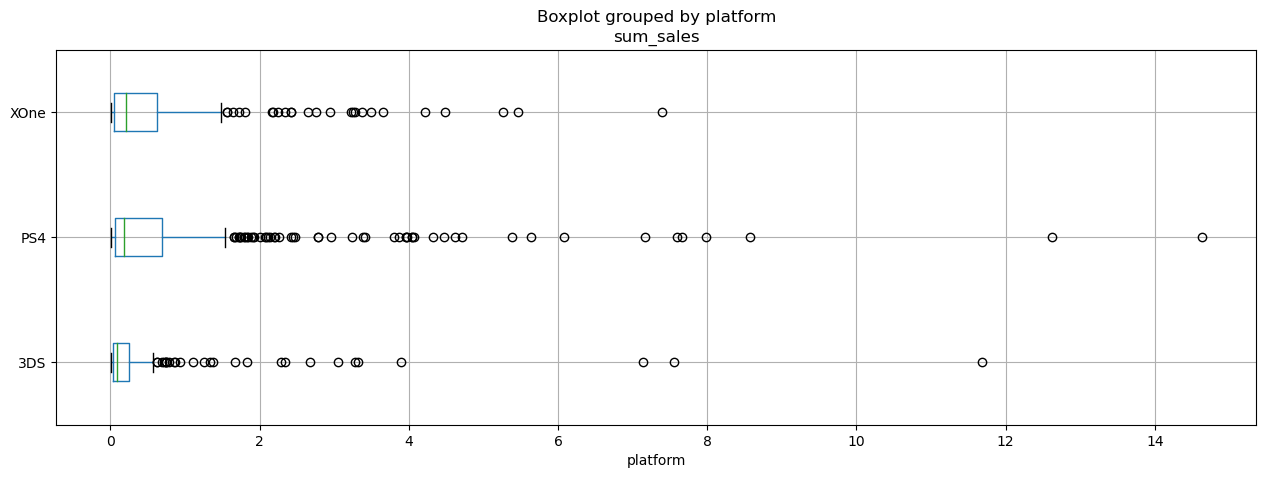

In [81]:
data[(data['year_of_release']>=2014) & (data['platform'].isin(platform_top3.index))].boxplot(
    column='sum_sales', by='platform', figsize=(15,5), vert=False);

Судя по общей диаграмме размаха в данных есть "выбросы". Данные "выбросы" могут быть реальными значениями, так как существуют игры, которые могли иметь большую популярность и соответственно большие продажажи.  

Приблизим диаграмму размаха и оценим ее без "выбросов":

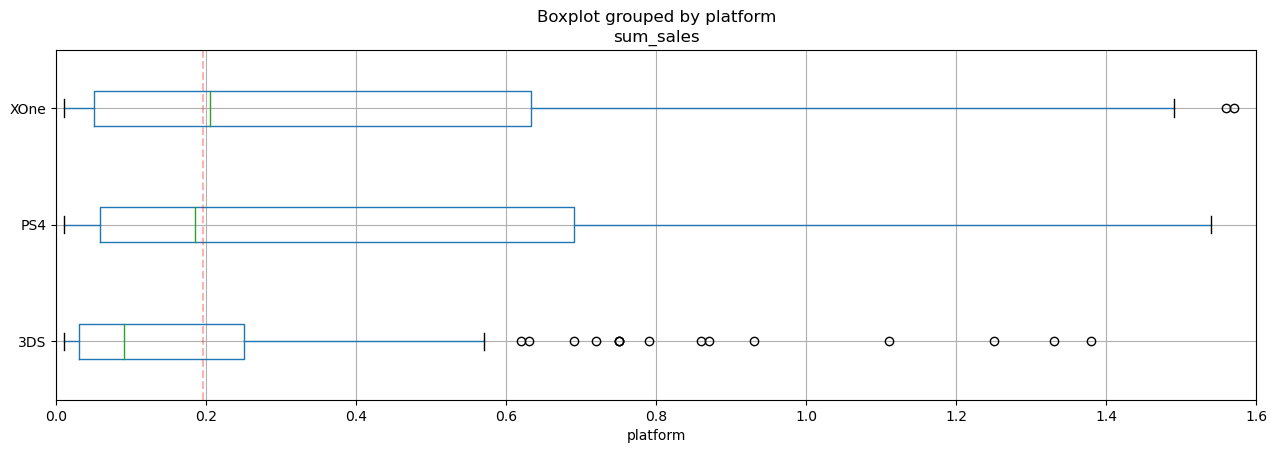

In [82]:
data[(data['year_of_release']>=2014) & (data['platform'].isin(platform_top3.index))].boxplot(
    column='sum_sales', by='platform', figsize=(15,5), vert=False);
plt.xlim(0, 1.6);
left, right = plt.ylim()
plt.vlines(0.195, ymin=left, ymax=right, color='r', linestyles='--', alpha=0.3)
plt.subplots_adjust(bottom=0.20)
plt.show()

* Медиана у плтаформ PS4 и XOne примерно равна 0,195
* Платформа 3DS отстает по суммарным продажам от PS4 и XOne больше чем в два раза, это вероятно связано с меньшей популярностью в мире

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами <a id='impact_reviews'></a>

Для исследования возьмем платформу PS4, как самую топовую по продажам за актуальный для нас период

Построим диаграмму рассеяния по платформе PS4, отобразив отзывы пользователей

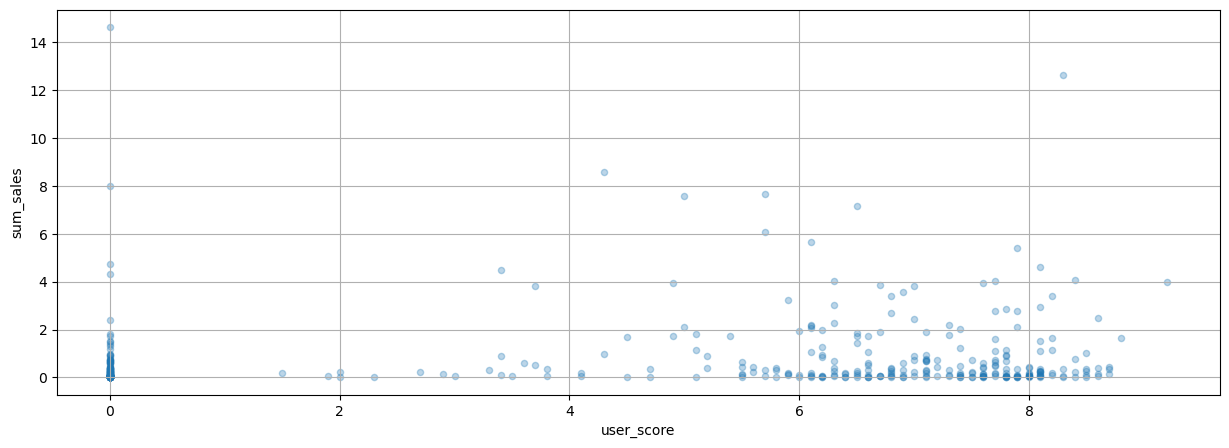

In [83]:
data[data['platform']=='PS4'].plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(15,5), grid=True);

Построим диаграмму рассеяния по платформе PS4, отобразив отзывы пользователей (исключая значения '0', так как они означают 'отсутствие оценки')

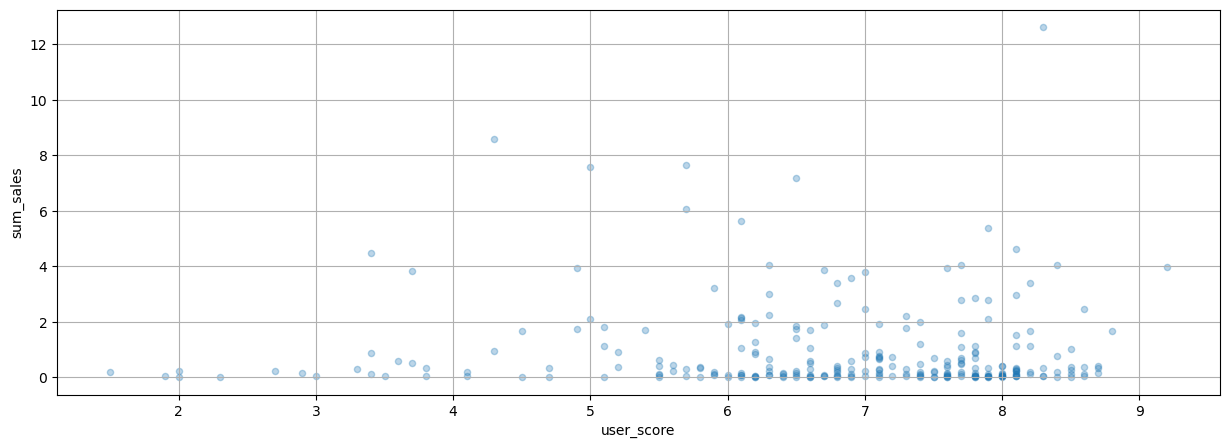

In [84]:
data[(data['platform']=='PS4') & (data['user_score']!=0)].plot(
    x='user_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(15,5), grid=True);

Построим диаграмму рассеяния по платформе PS4, отобразив отзывы критиков

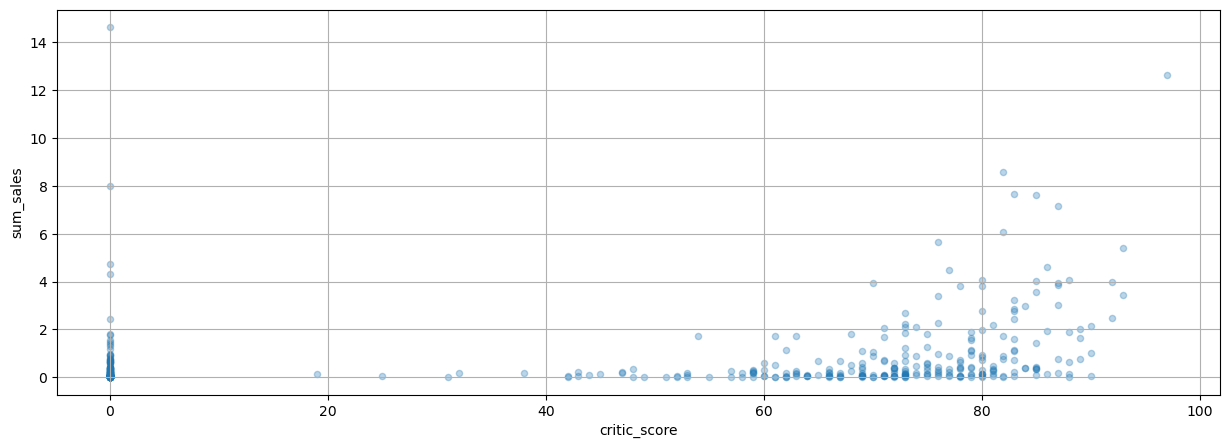

In [85]:
data[data['platform']=='PS4'].plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(15,5), grid=True);

Построим диаграмму рассеяния по платформе PS4, отобразив отзывы критиков (исключая значения '0', так как они означают 'отсутствие оценки')

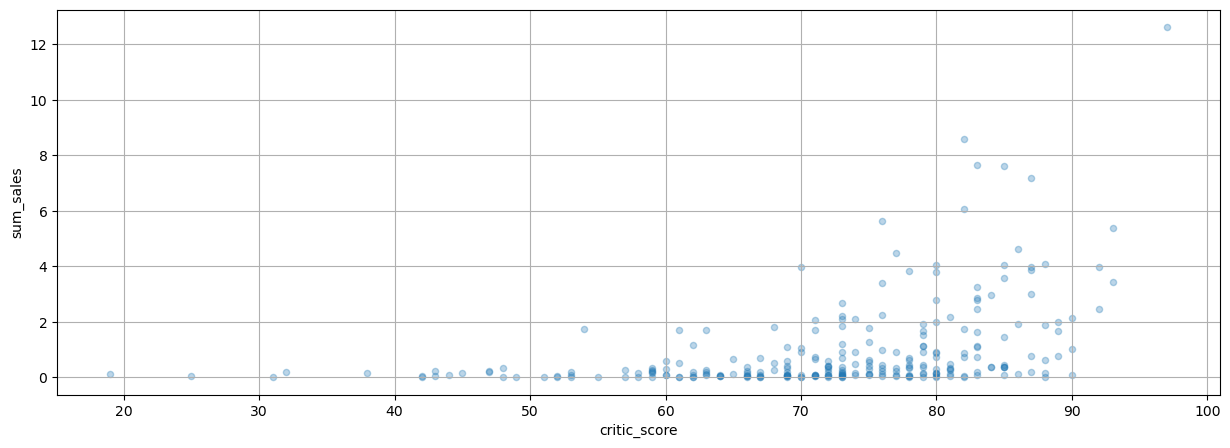

In [86]:
data[(data['platform']=='PS4') & (data['critic_score']!=0)].plot(
    x='critic_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(15,5), grid=True);

In [87]:
def cor_info (cor):
    if cor == 0:
        return print(f'Коэффициент корреляции: {cor} \n Свзяь отсутствует')
    elif 0 < cor <= 0.3:
        return print(f'Коэффициент корреляции: {cor} \n Слабая прямая связь')
    elif -0.3 <= cor < 0:
        return print(f'Коэффициент корреляции: {cor} \n Слабая обратная связь')
    elif 0.3 < cor <= 0.7:
        return print(f'Коэффициент корреляции: {cor} \n Средняя прямая связь')
    elif -0.7 <= cor < -0.3:
        return print(f'Коэффициент корреляции: {cor} \n Средняя обратная связь')
    elif 0.7 < cor < 1:
        return print(f'Коэффициент корреляции: {cor} \n Сильная прямая связь')
    elif -1 < cor < -0.7:
        return print(f'Коэффициент корреляции: {cor} \n Сильная обратная связь')
    elif cor == 1:
        return print(f'Коэффициент корреляции: {cor} \n Полная прямая связь')
    elif cor == -1:
        return print(f'Коэффициент корреляции: {cor} \n Полная обратная связь')
    else:
        return print('Введен неверный коэффициент')

Оценим коэффициент корреляции для оценок пользователей

In [88]:
cor_info(data[data['platform']=='PS4']['user_score'].corr(data['sum_sales']))

Коэффициент корреляции: 0.11311562454844899 
 Слабая прямая связь


Оценим коэффициент корреляции для оценок пользователей (исключая значения '0', так как они означают 'отсутствие оценки')

In [89]:
cor_info(data[(data['platform']=='PS4') & (data['user_score']!=0)]['user_score'].corr(data['sum_sales']))

Коэффициент корреляции: -0.03195710560396694 
 Слабая обратная связь


Оценим коэффициент корреляции для оценок критиков

In [90]:
cor_info(data[data['platform']=='PS4']['critic_score'].corr(data['sum_sales']))

Коэффициент корреляции: 0.22754960537627827 
 Слабая прямая связь


Оценим коэффициент корреляции для оценок критиков (исключая значения '0', так как они означают 'отсутствие оценки')

In [91]:
cor_info(data[(data['platform']=='PS4') & (data['critic_score']!=0)]['critic_score'].corr(data['sum_sales']))

Коэффициент корреляции: 0.4065679010283494 
 Средняя прямая связь


* Судя по диаграммам большую часть составляют высокие оценки
* Для оценок пользователей:
    - Коэффициент корреляции: -0.031957105603966945 
    - Слабая обратная связь
* Для оценок критиков:
    - Коэффициент корреляции: 0.40656790102834933
    - Средняя прямая связь

#### Соотнесем выводы с продажами игр на других платформах <a id='boxplot_all'></a>

In [92]:
data[data['year_of_release']>=2014].groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188369,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766355,1.614970,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161466,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


Построим диаграмму размаха по всем платформам в актуальный для нас период

Сделаем несколько диаграмм с постепенным уменьшением диапазона, для того чтобы убрать редкие выбросы и оставить более частые, которые важны для анализа

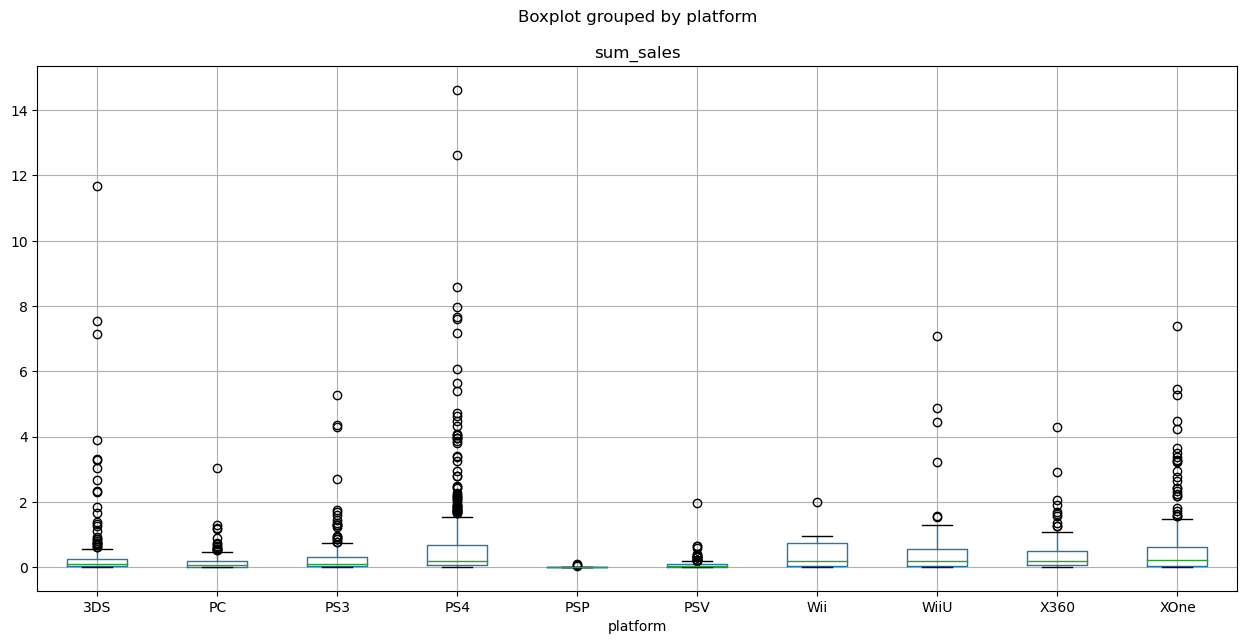

In [93]:
data[data['year_of_release']>=2014].boxplot(column='sum_sales', by='platform', figsize=(15,7));

На диаграмме видно, что есть очень редкие выбросы с продажами больше 10 млн (вероятно, эти игры были очень популярны), так же редкие, в отличии от других, выбросы есть в диапазоне от 5 до 10 млн.<br>
Уберем эти выбросы и еще раз посмотрим на диаграмму размаха:

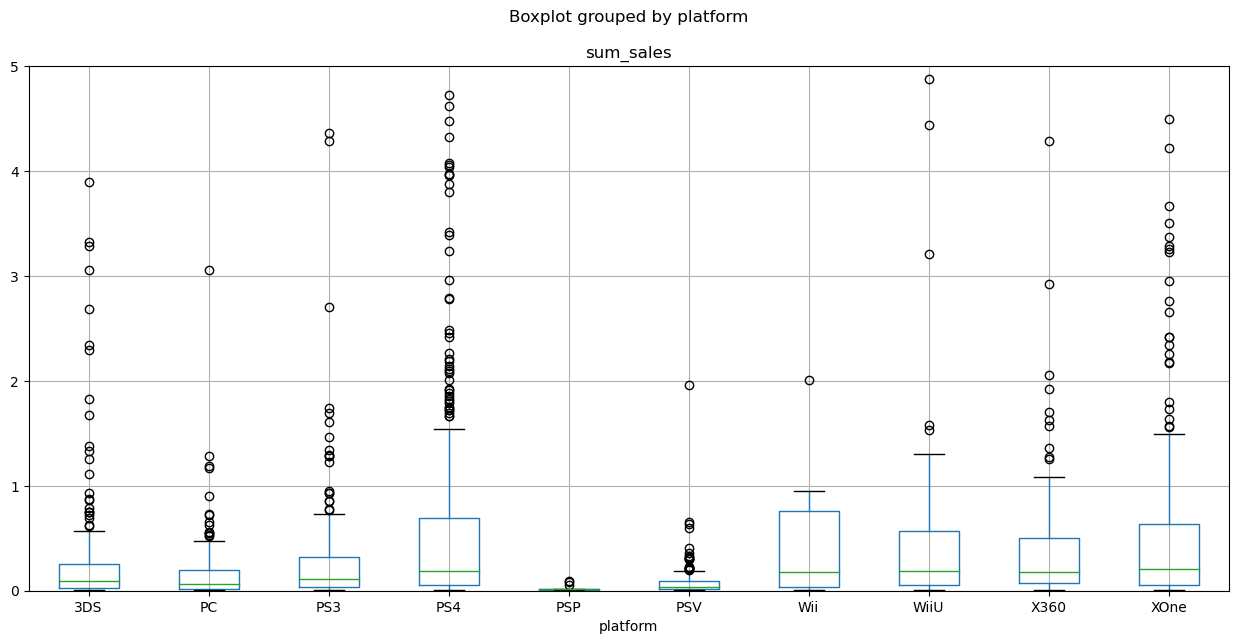

In [94]:
data[data['year_of_release']>=2014].boxplot(column='sum_sales', by='platform', figsize=(15,7));
plt.ylim(0, 5);

На диаграмме видно, что все еще есть выбросы в диапазоне от 2,5 до 5 млн.
Уберем эти выбросы и еще раз посмотрим на диаграмму размаха:

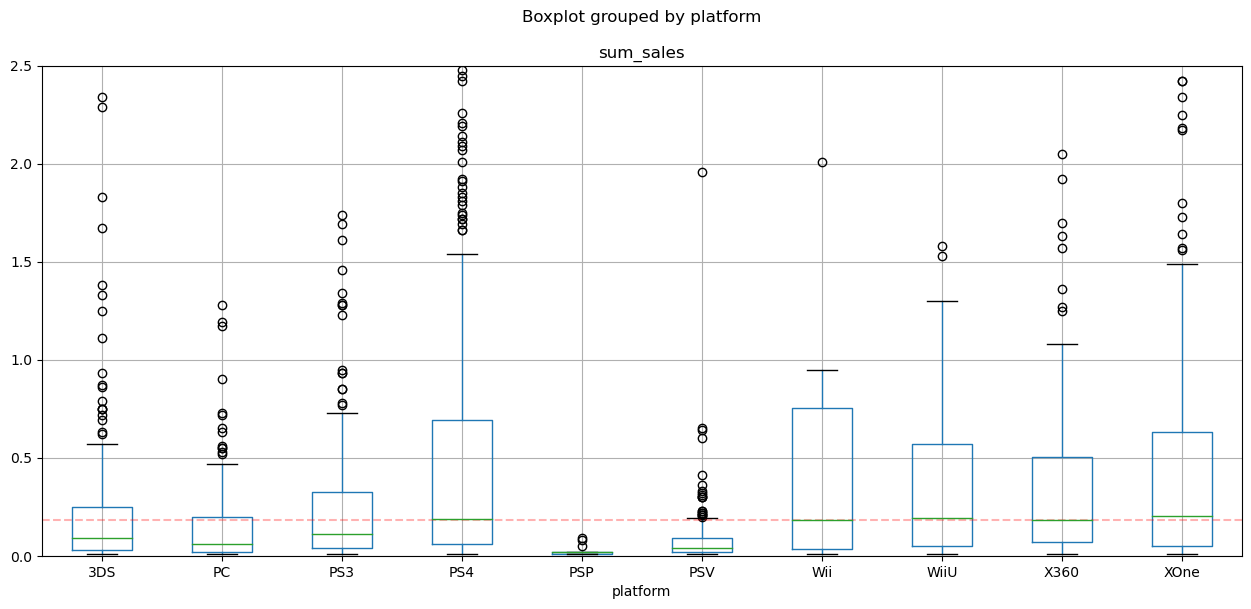

In [95]:
data[data['year_of_release']>=2014].boxplot(column='sum_sales', by='platform', figsize=(15,7));
plt.ylim(0, 2.5);
left, right = plt.xlim()
plt.hlines(0.18, xmin=left, xmax=right, color='r', linestyles='--', alpha=0.3)
plt.subplots_adjust(bottom=0.20)
plt.show()


* На итоговой диаграмме видно что все позиции имеют выбросы и убирать их было бы ошибкой из-за их частоты.

* Выделяются несколько платформ: PS4, XOne, X360, Wii и WiiU. Границы этих платформ высокие, но при этом медиана у всех примерно равна 0,18

#### Посмотрим на общее распределение игр по жанрам  <a id='distribution_genre'></a>

Данные по всем платформам в актуальный для нас период: <a id='distribution_genre_all'></a>

Количество продаж по жанрам:


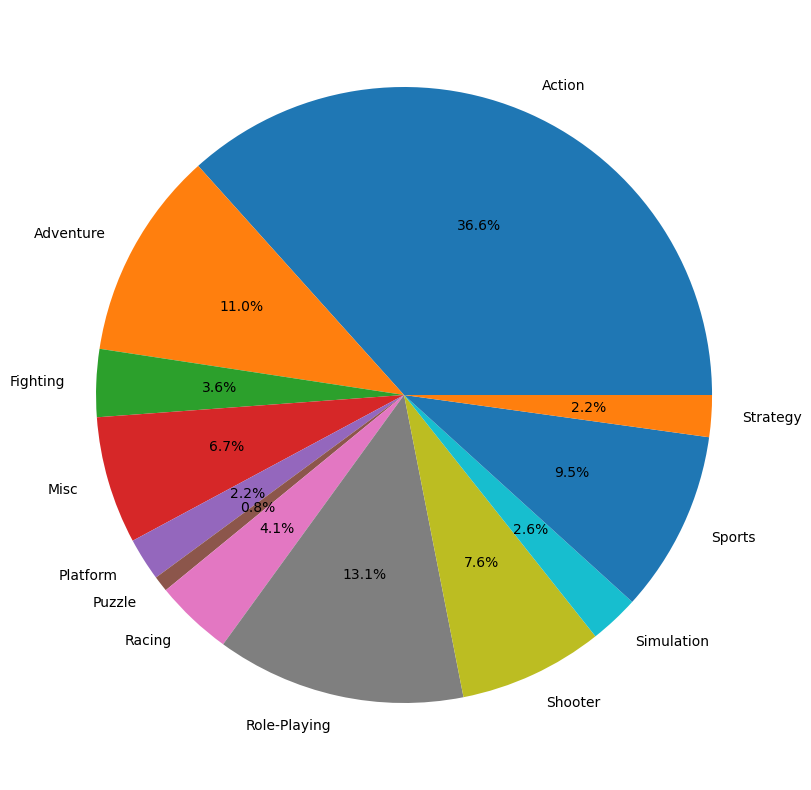

In [96]:
print('Количество продаж по жанрам:')
data[data['year_of_release']>=2014].pivot_table(index='genre', values='sum_sales', aggfunc='count').plot(
    kind='pie', y='sum_sales', figsize=(10,10), legend=False, label='', autopct='%1.1f%%');

In [97]:
genre_top5_count = data[data['year_of_release']>=2014].pivot_table(
    index='genre', values='sum_sales', aggfunc='count').sort_values(by='sum_sales', ascending=False).head(5)
print('Топ-5 жанров по количеству продаж:')
display(genre_top5_count)
print()
genre_bottom5_count = data[data['year_of_release']>=2014].pivot_table(
    index='genre', values='sum_sales', aggfunc='count').sort_values(by='sum_sales', ascending=False).tail(5)
print('Топ-5 непопулярных жанров по количеству продаж:')
display(genre_bottom5_count)

Топ-5 жанров по количеству продаж:


,sum_sales
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128



Топ-5 непопулярных жанров по количеству продаж:


,sum_sales
genre,
Fighting,60
Simulation,44
Platform,38
Strategy,37
Puzzle,14


Медианный доход с продаж по жанрам


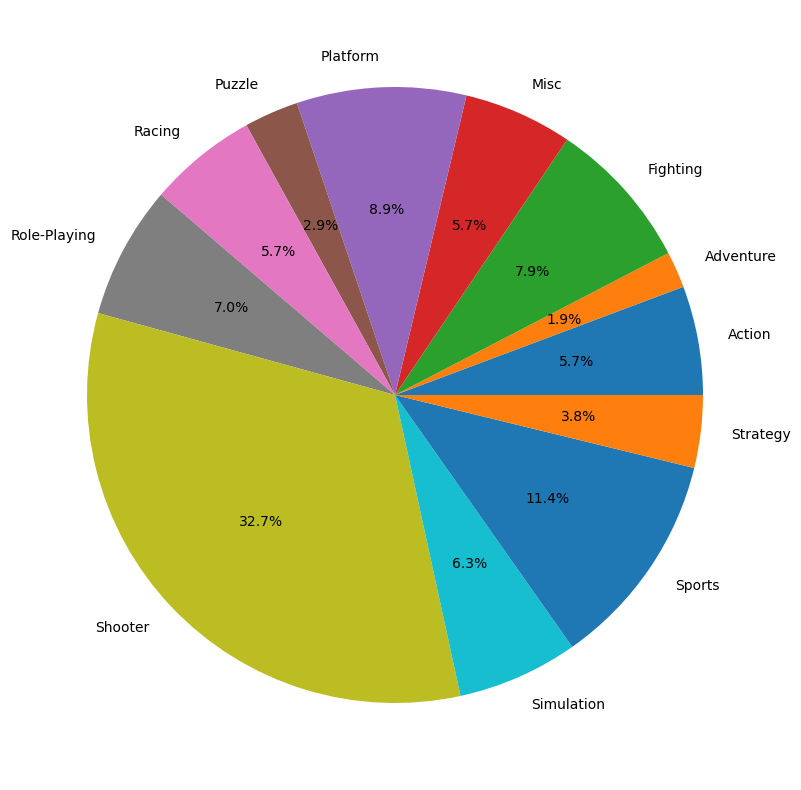

In [98]:
print('Медианный доход с продаж по жанрам')
data[data['year_of_release']>=2014].pivot_table(index='genre', values='sum_sales', aggfunc='median').plot(
    kind='pie', y='sum_sales', figsize=(10,10), legend=False, label='', autopct='%1.1f%%');

In [99]:
genre_top5_sum = data[data['year_of_release']>=2014].pivot_table(
    index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False).head(5)
print('Топ-5 жанров по медманному доходу с продаж:')
display(genre_top5_sum)
print()
genre_bottom5_sum = data[data['year_of_release']>=2014].pivot_table(
    index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False).tail(5)
print('Топ-5 непопулярных жанров по медианному доходу с продаж:')
display(genre_bottom5_sum)

Топ-5 жанров по медманному доходу с продаж:


,sum_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110



Топ-5 непопулярных жанров по медианному доходу с продаж:


,sum_sales
genre,
Action,0.090
Racing,0.090
Strategy,0.060
Puzzle,0.045
Adventure,0.030


Данные по определенными нами Top-3 платформам в актуальный для нас период: <a id='distribution_genre_top3'></a>

Количество продаж по жанрам:


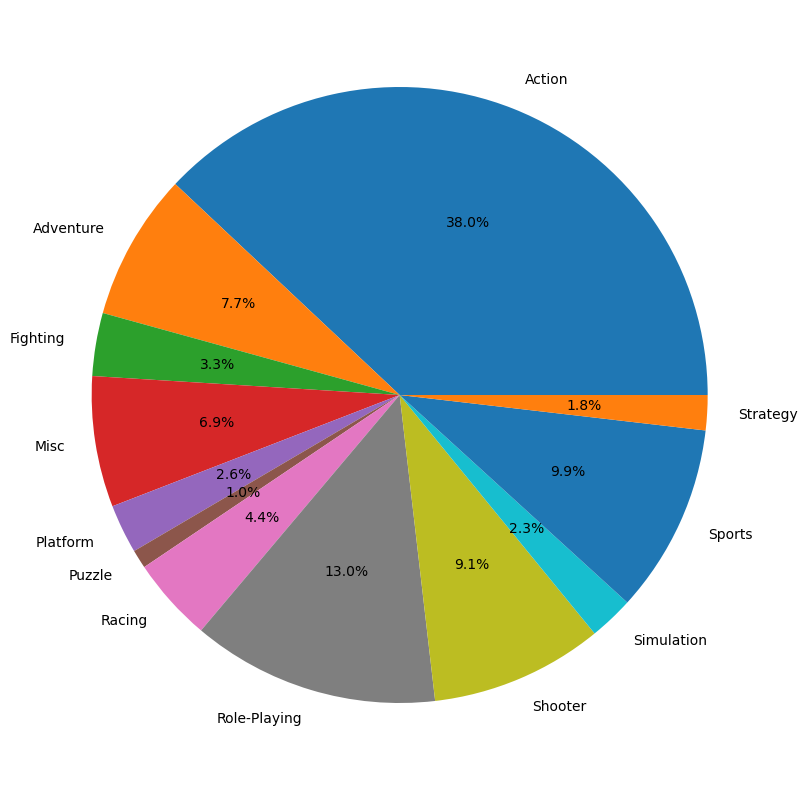

In [100]:
print('Количество продаж по жанрам:')
data[(data['year_of_release']>=2014) & (data['platform'].isin(platform_top3.index))].pivot_table(
    index='genre', values='sum_sales', aggfunc='count').plot(
    kind='pie', y='sum_sales', figsize=(10,10), legend=False, label='', autopct='%1.1f%%');

In [101]:
genre_top5_count = data[(data['year_of_release']>=2014) & (data['platform'].isin(platform_top3.index))].pivot_table(
    index='genre', values='sum_sales', aggfunc='count').sort_values(by='sum_sales', ascending=False).head(5)
print('Топ-5 жанров по количеству продаж:')
display(genre_top5_count)
print()
genre_bottom5_count = data[(data['year_of_release']>=2014) & (data['platform'].isin(platform_top3.index))].pivot_table(
    index='genre', values='sum_sales', aggfunc='count').sort_values(by='sum_sales', ascending=False).tail(5)
print('Топ-5 непопулярных жанров по количеству продаж:')
display(genre_bottom5_count)

Топ-5 жанров по количеству продаж:


,sum_sales
genre,
Action,310
Role-Playing,106
Sports,81
Shooter,74
Adventure,63



Топ-5 непопулярных жанров по количеству продаж:


,sum_sales
genre,
Fighting,27
Platform,21
Simulation,19
Strategy,15
Puzzle,8


Медианный доход с продаж по жанрам


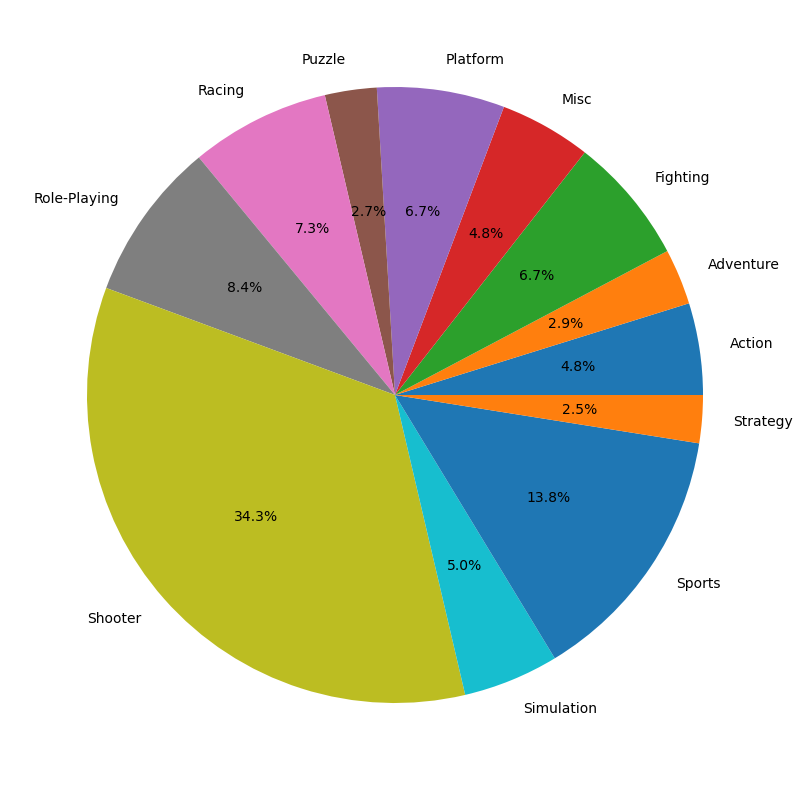

In [102]:
print('Медианный доход с продаж по жанрам')
data[(data['year_of_release']>=2014) & (data['platform'].isin(platform_top3.index))].pivot_table(
    index='genre', values='sum_sales', aggfunc='median').plot(
    kind='pie', y='sum_sales', figsize=(10,10), legend=False, label='', autopct='%1.1f%%');

In [103]:
genre_top5_sum = data[(data['year_of_release']>=2014) & (data['platform'].isin(platform_top3.index))].pivot_table(
    index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False).head(5)
print('Топ-5 жанров по медианному доходу с продаж:')
display(genre_top5_sum)
print()
genre_bottom5_sum = data[(data['year_of_release']>=2014) & (data['platform'].isin(platform_top3.index))].pivot_table(
    index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False).tail(5)
print('Топ-5 непопулярных жанров по медианному доходу с продаж:')
display(genre_bottom5_sum)

Топ-5 жанров по медианному доходу с продаж:


,sum_sales
genre,
Shooter,0.820
Sports,0.330
Role-Playing,0.200
Racing,0.175
Platform,0.160



Топ-5 непопулярных жанров по медианному доходу с продаж:


,sum_sales
genre,
Action,0.115
Misc,0.115
Adventure,0.070
Puzzle,0.065
Strategy,0.060


В актуальный для нас период (как по всем платформам, так и по определенными нами Top-3) большую часть прибыли приносят игры жанра 'Shooter'. Если учесть количество проданных уникальных игр в этом жанре (занимает последние строчки Top-5), можем сделать вывод, что данный жанр наиболее выгодный для продаж

### Составим портрет пользователя каждого региона <a id='user_region'></a>

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)


#### Регион 'NA' <a id='user_region_NA'></a>

ТОП-5 самых популярных платформ в Северной Америке за все время

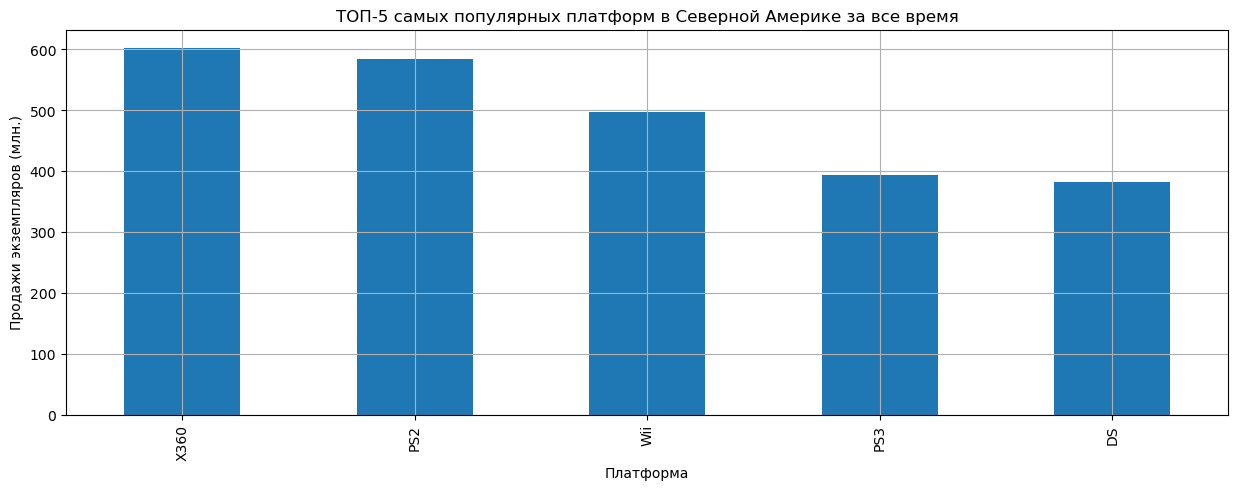

In [104]:
data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'na_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке за все время');
plt.xlabel('Платформа');
plt.ylabel('Продажи экземпляров (млн.)');

ТОП-5 самых популярных платформ в Северной Америке за актуальный период

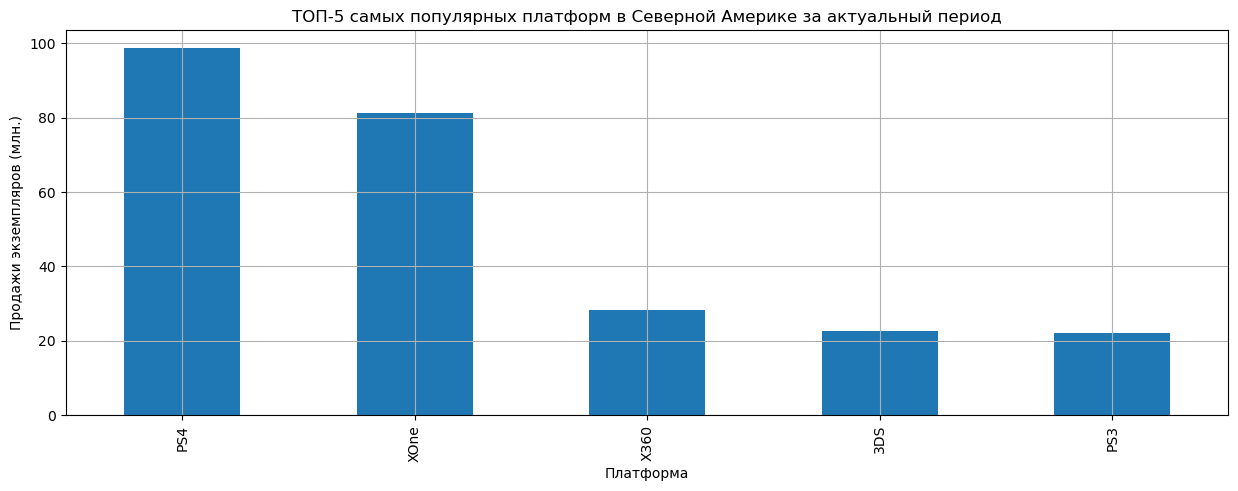

In [105]:
data[data['year_of_release']>=2014].groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'na_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке за актуальный период');
plt.xlabel('Платформа');
plt.ylabel('Продажи экземпляров (млн.)');

Посчитаем долю продаж в Северной Америке для Top-5 платформ за актуальный период

In [106]:
platform_count_full = data[data['year_of_release']>=2014].groupby('platform')['sum_sales'].sum()
platform_na = data[data['year_of_release']>=2014].groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
percent_na = platform_na / platform_count_full * 100
print('Доля продаж в Северной Америке:')
display(percent_na.sort_values(ascending=False).head())

Доля продаж в Северной Америке:


platform
X360    58.689339
XOne    57.901108
PS4     34.221760
PS3     32.340858
3DS     26.119057
dtype: float32

ТОП-5 самых популярных жанров в Северной Америке за все время

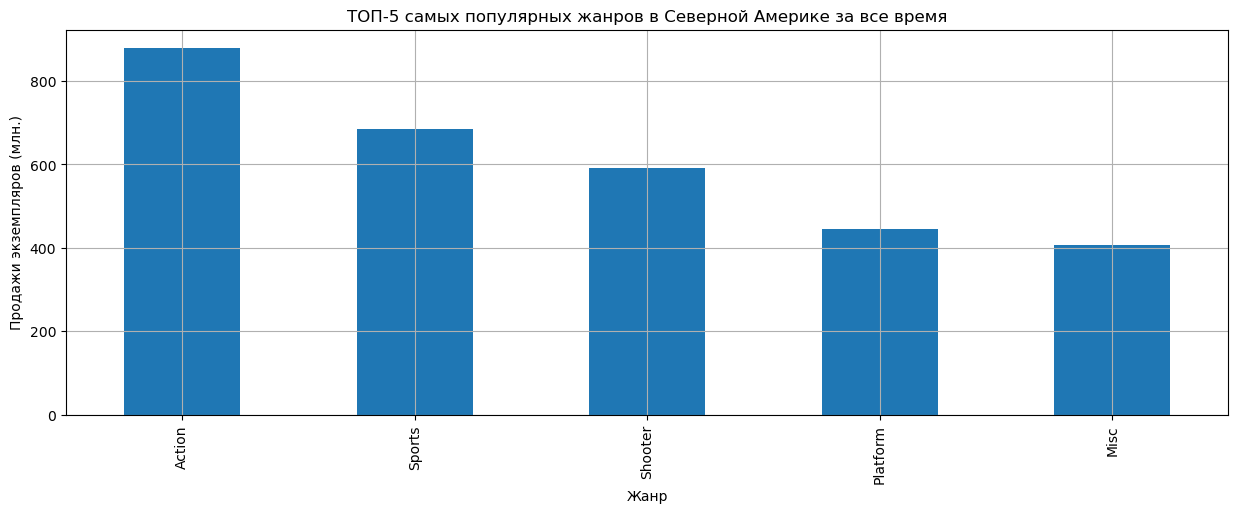

In [107]:
data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'na_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке за все время');
plt.xlabel('Жанр');
plt.ylabel('Продажи экземпляров (млн.)');

ТОП-5 самых популярных жанров в Северной Америке за актуальный период

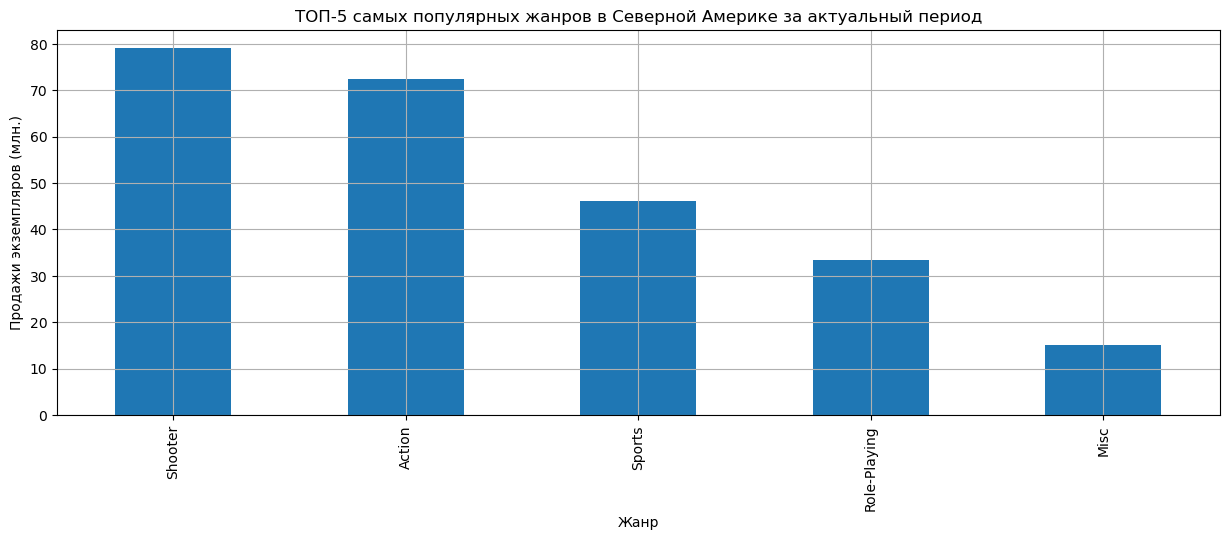

In [108]:
data[data['year_of_release']>=2014].groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'na_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке за актуальный период');
plt.xlabel('Жанр');
plt.ylabel('Продажи экземпляров (млн.)');

Посчитаем долю продаж в Северной Америке для Top-5 жанров за актуальный период

In [109]:
platform_count_full = data[data['year_of_release']>=2014].groupby('genre')['sum_sales'].sum()
platform_na = data[data['year_of_release']>=2014].groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
percent_na = platform_na / platform_count_full * 100
print('Доля продаж в Северной Америке:')
display(percent_na.sort_values(ascending=False).head())

Доля продаж в Северной Америке:


genre
Shooter         46.226742
Sports          42.135548
Misc            40.079895
Action          36.381420
Role-Playing    32.994877
dtype: float32

Рейтинг от организации ESRB в Северной Америке за актуальный период (за исключением "неизвестного")

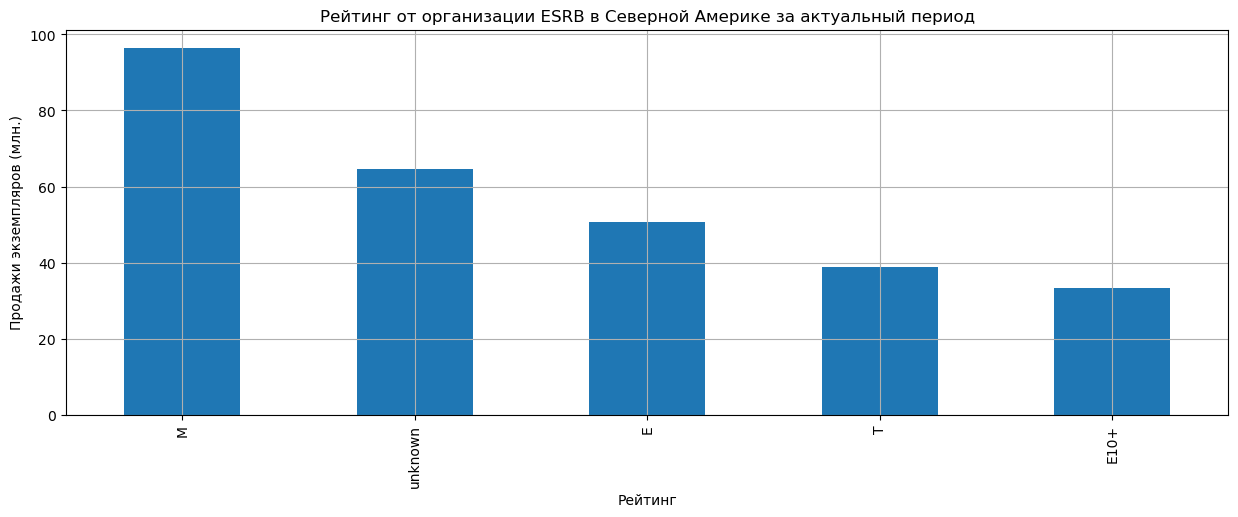

In [110]:
rating_na = data[data['year_of_release']>=2014].groupby(
    'rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(15,5), grid=True,
               title = 'Рейтинг от организации ESRB в Северной Америке за актуальный период');
plt.xlabel('Рейтинг');
plt.ylabel('Продажи экземпляров (млн.)');

В Северной Америке самые высокие продажи у рейтинга «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории

#### Регион 'EU'  <a id='user_region_EU'></a>

ТОП-5 самых популярных платформ в Европе за все время

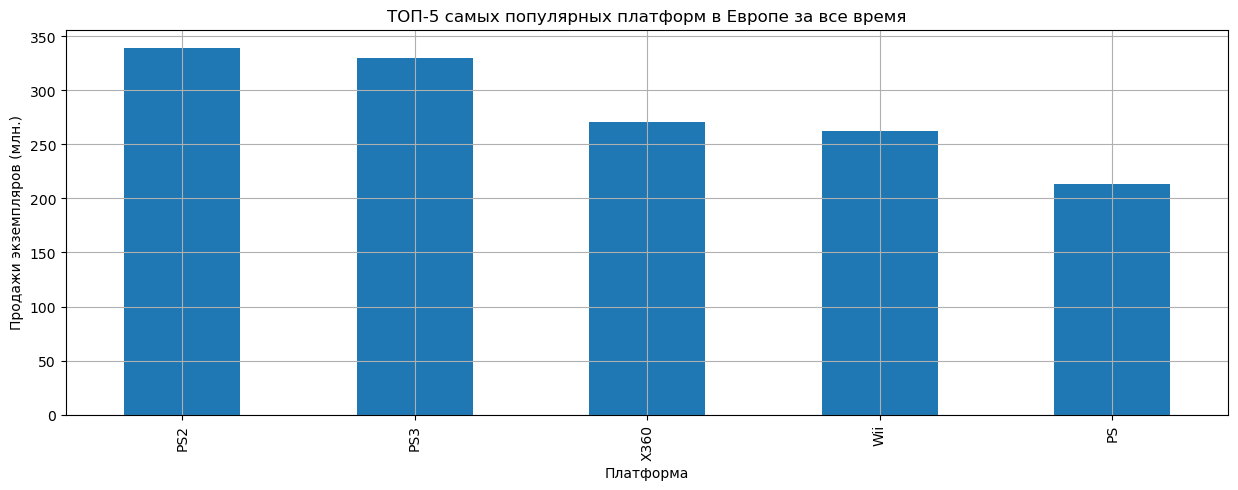

In [111]:
data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных платформ в Европе за все время');
plt.xlabel('Платформа');
plt.ylabel('Продажи экземпляров (млн.)');

ТОП-5 самых популярных платформ в Европе за актуальный период

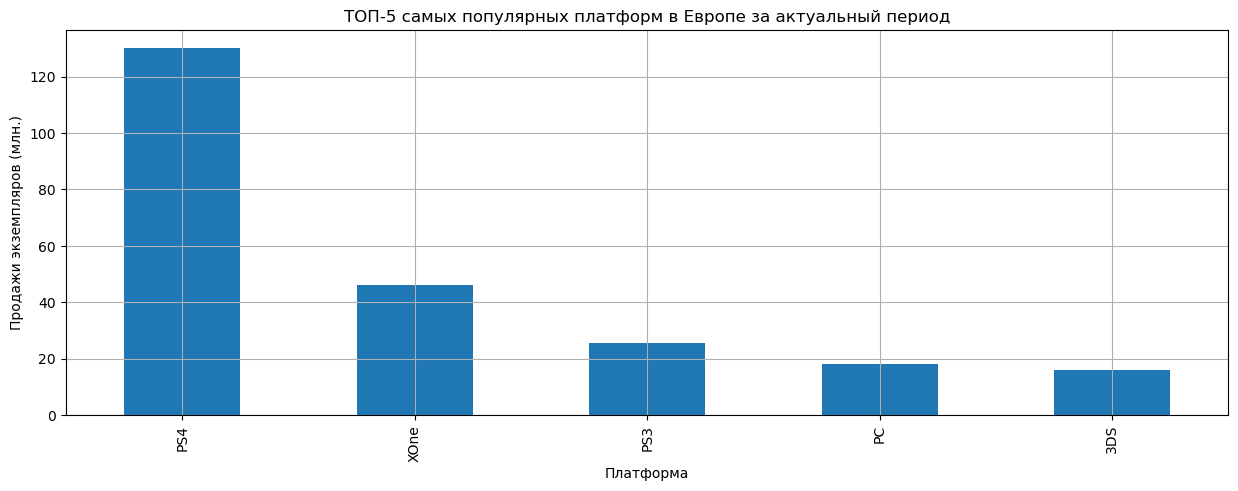

In [112]:
data[data['year_of_release']>=2014].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных платформ в Европе за актуальный период');
plt.xlabel('Платформа');
plt.ylabel('Продажи экземпляров (млн.)');

Посчитаем долю продаж в Европе для Top-5 платформ за актуальный период

In [113]:
platform_count_full = data[data['year_of_release']>=2014].groupby('platform')['sum_sales'].sum()
platform_na = data[data['year_of_release']>=2014].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
percent_na = platform_na / platform_count_full * 100
print('Доля продаж в Европе:')
display(percent_na.sort_values(ascending=False).head())

Доля продаж в Европе:


platform
PC      66.432533
PS4     45.129272
PS3     37.459663
XOne    32.950981
3DS     18.597139
dtype: float32

ТОП-5 самых популярных жанров в Европе за все время

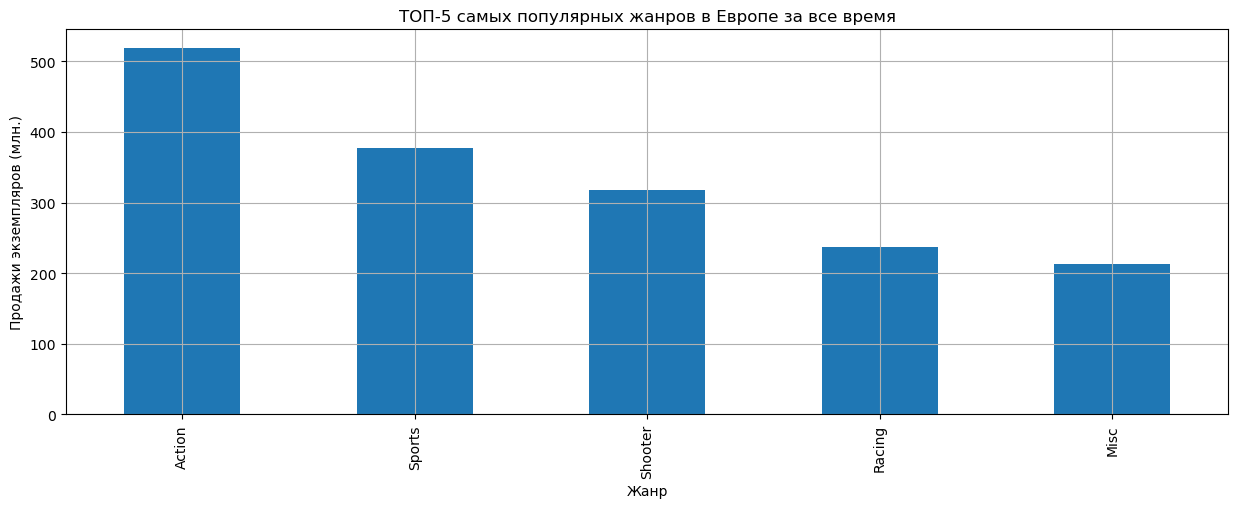

In [114]:
data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных жанров в Европе за все время');
plt.xlabel('Жанр');
plt.ylabel('Продажи экземпляров (млн.)');

ТОП-5 самых популярных жанров в Европе за актуальный период

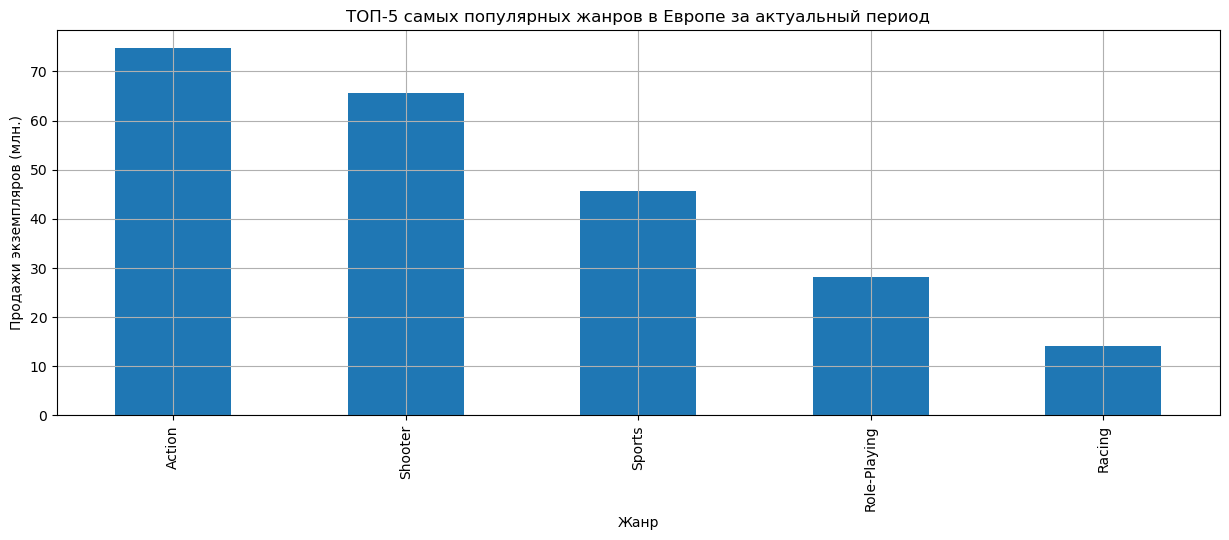

In [115]:
data[data['year_of_release']>=2014].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных жанров в Европе за актуальный период');
plt.xlabel('Жанр');
plt.ylabel('Продажи экземпляров (млн.)');

Посчитаем долю продаж в Европе для Top-5 жанров за актуальный период

In [116]:
platform_count_full = data[data['year_of_release']>=2014].groupby('genre')['sum_sales'].sum()
platform_na = data[data['year_of_release']>=2014].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
percent_na = platform_na / platform_count_full * 100
print('Доля продаж в Европе:')
display(percent_na.sort_values(ascending=False).head())

Доля продаж в Европе:


genre
Racing          51.344479
Sports          41.770184
Shooter         38.329235
Action          37.459869
Role-Playing    27.770111
dtype: float32

Рейтинг от организации ESRB в Европе за актуальный период (за исключением "неизвестного")

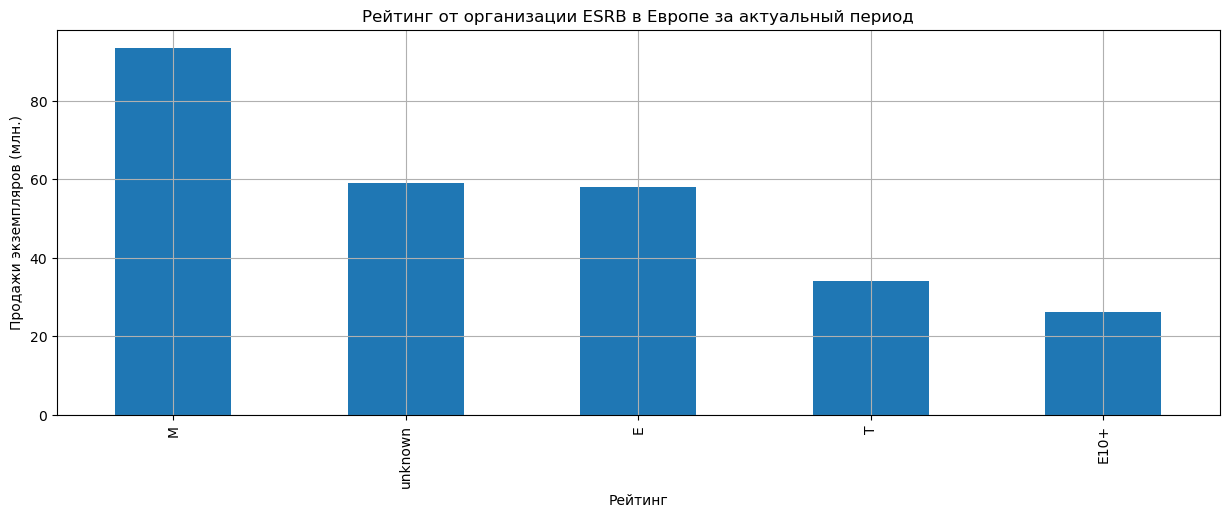

In [117]:
rating_eu = data[data['year_of_release']>=2014].groupby(
    'rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(15,5), grid=True,
               title = 'Рейтинг от организации ESRB в Европе за актуальный период');
plt.xlabel('Рейтинг');
plt.ylabel('Продажи экземпляров (млн.)');

В Европе самые высокие продажи у рейтинга «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории

#### Регион 'JP'  <a id='user_region_JP'></a>

ТОП-5 самых популярных платформ в Японии за все время

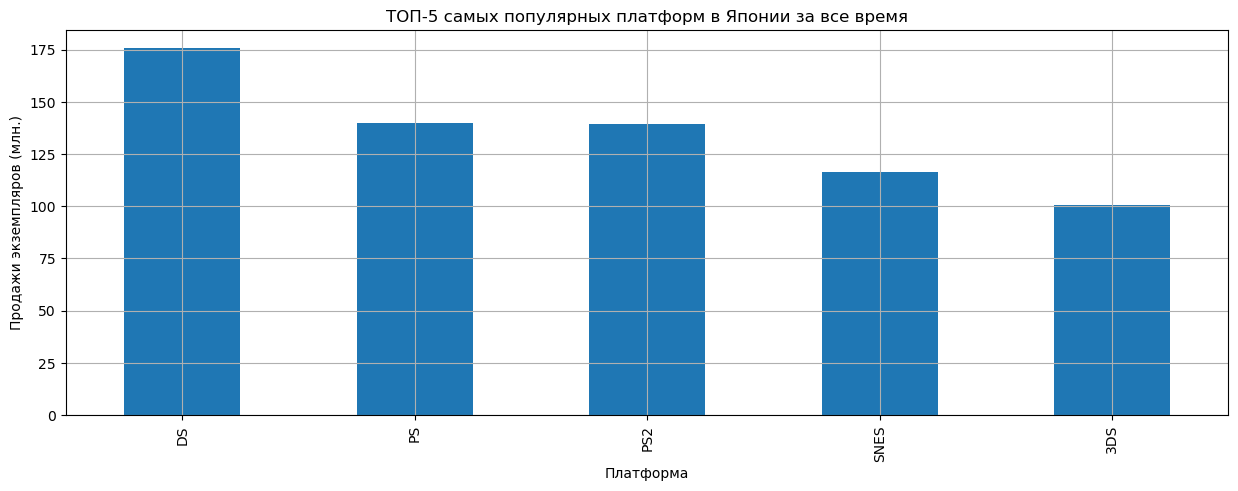

In [118]:
data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных платформ в Японии за все время');
plt.xlabel('Платформа');
plt.ylabel('Продажи экземпляров (млн.)');

ТОП-5 самых популярных платформ в Японии за актуальный период

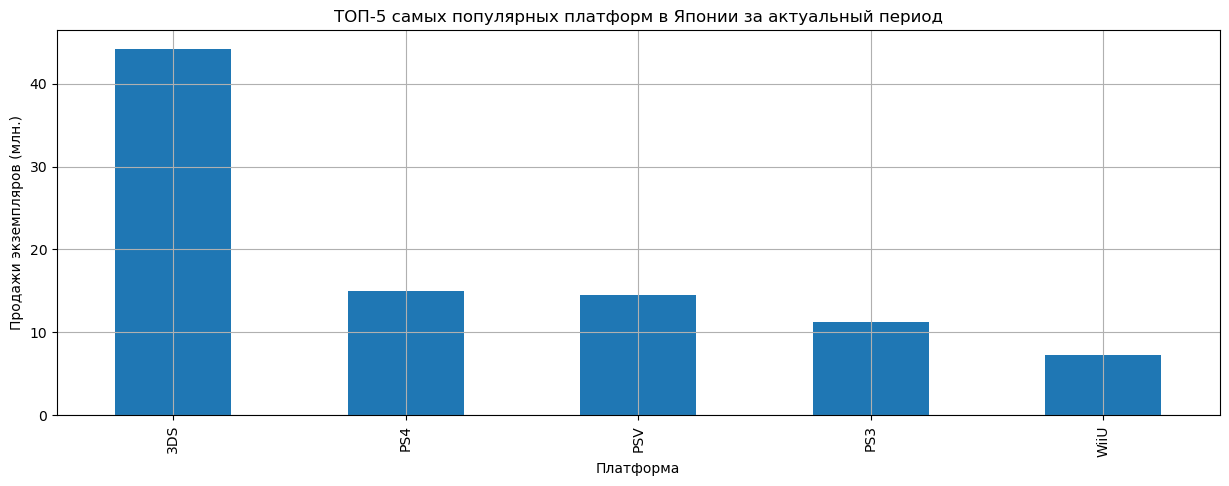

In [119]:
data[data['year_of_release']>=2014].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных платформ в Японии за актуальный период');
plt.xlabel('Платформа');
plt.ylabel('Продажи экземпляров (млн.)');

Посчитаем долю продаж в Японии для Top-5 платформ за актуальный период

In [120]:
platform_count_full = data[data['year_of_release']>=2014].groupby('platform')['sum_sales'].sum()
platform_na = data[data['year_of_release']>=2014].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
percent_na = platform_na / platform_count_full * 100
print('Доля продаж в Японии:')
display(percent_na.sort_values(ascending=False).head())

Доля продаж в Японии:


platform
PSV     64.910713
3DS     51.038300
WiiU    17.007912
PS3     16.456438
PS4      5.212563
dtype: float32

ТОП-5 самых популярных жанров в Японии за все время

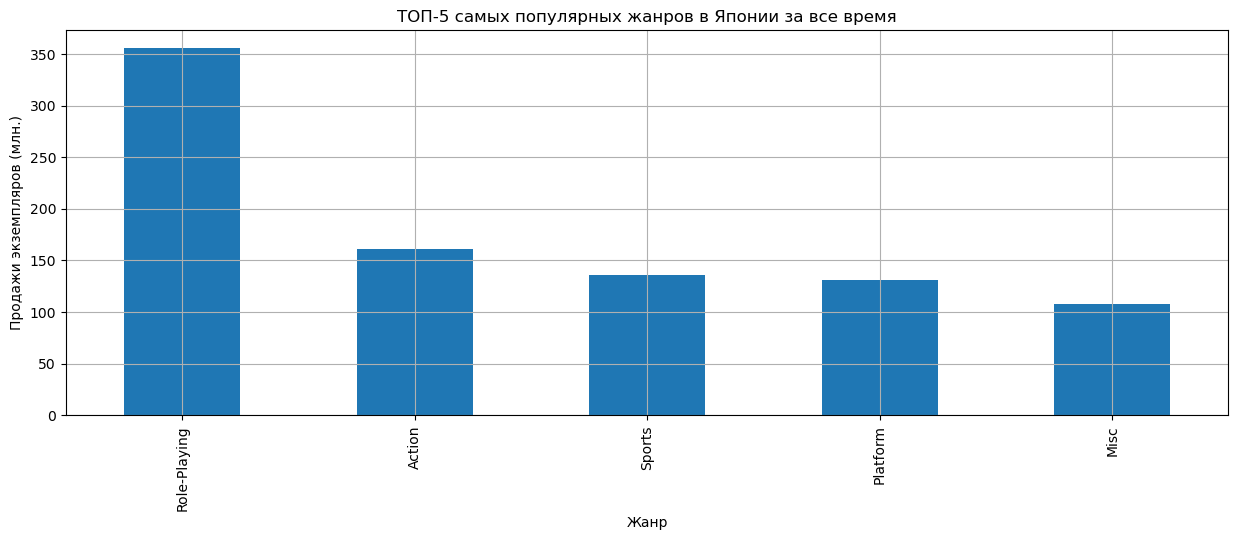

In [121]:
data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных жанров в Японии за все время');
plt.xlabel('Жанр');
plt.ylabel('Продажи экземпляров (млн.)');

ТОП-5 самых популярных жанров в Японии за актуальный период

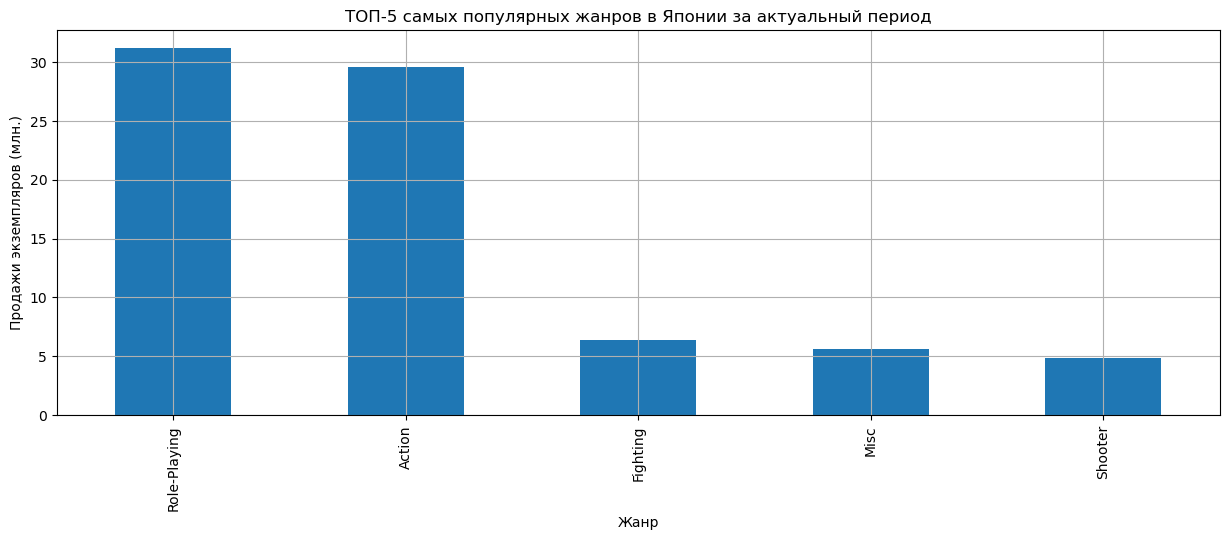

In [122]:
data[data['year_of_release']>=2014].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(
    x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(15,5),
                     grid=True, title = 'ТОП-5 самых популярных жанров в Японии за актуальный период');
plt.xlabel('Жанр');
plt.ylabel('Продажи экземпляров (млн.)');

Посчитаем долю продаж в Японии для Top-5 жанров за актуальный период

In [123]:
platform_count_full = data[data['year_of_release']>=2014].groupby('genre')['sum_sales'].sum()
platform_na = data[data['year_of_release']>=2014].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
percent_na = platform_na / platform_count_full * 100
print('Доля продаж в Японии:')
display(percent_na.sort_values(ascending=False).head())

Доля продаж в Японии:


genre
Role-Playing    30.717665
Fighting        22.572643
Misc            14.940080
Action          14.837480
Shooter          2.848953
dtype: float32

Рейтинг от организации ESRB в Японии за актуальный период (за исключением "неизвестного")

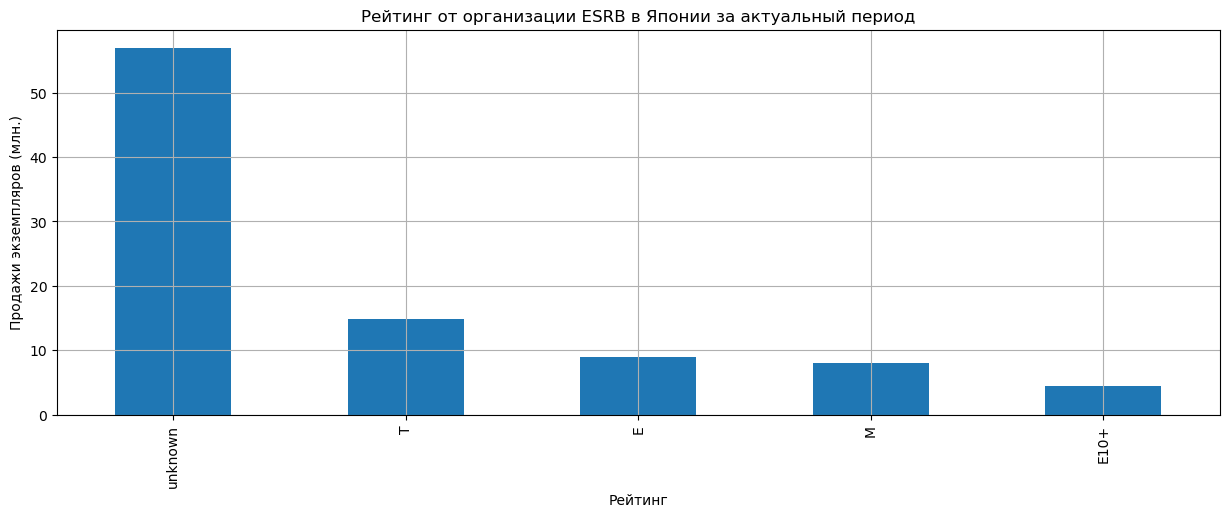

In [124]:
rating_jp = data[data['year_of_release']>=2014].groupby(
    'rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(15,5), grid=True,
               title = 'Рейтинг от организации ESRB в Японии за актуальный период');
plt.xlabel('Рейтинг');
plt.ylabel('Продажи экземпляров (млн.)');

В Японии самые высокие продажи у игр с неприсвоенным рейтингом. Вероятно это связано с тем что рейтинг присваивает организация ESRB, чье основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде

Каждый регион отличается топовыми позициями
<br>
* Первые места по платформам за актуальный период:
    * в Северной Америке - PS4
    * в Европе - PS4
    * в Японии - 3DS
<br>
* Первые места по жанрам за актуальный период:
    * в Северной Америке - Shooter
    * в Европе - Action
    * в Японии - Role-Playing
<br>
* Первые места по рейтингу от организации ESRB за актуальный период:
    * в Северной Америке - M
    * в Европе - M
    * в Японии - неприсвоенный рейтинг

### Проверим гипотезы  <a id='hypotheses'></a>

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные


**Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые** <a id='hypothesis_1'></a>

Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" сформулируем в качестве нулевой и альтернативной гипотезы:
* H0: средние рейтинги по платформам одинаковые
* H1: средние рейтинги по платформам разные
  
Установим alpha = 0.05 - критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

In [125]:
xbox = data[(data['user_score'] != 0) & (data['platform'] == 'XOne') & (data['year_of_release']>=2014)]['user_score']
pc = data[(data['user_score'] != 0) & (data['platform'] == 'PC') & (data['year_of_release']>=2014)]['user_score']
alpha = .05 

results = st.ttest_ind(xbox, pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450648833224654
Не получилось отвергнуть нулевую гипотезу


Гипотеза: "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - верна

**Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные** <a id='hypothesis_2'></a>

Для проверки гипотезы "cредние пользовательские рейтинги жанров Action и Sports разные" сформулируем в качестве нулевой и альтернативной гипотезы:
* H0: средние рейтинги по жанрам одинаковые
* H1: средние рейтинги по жанрам разные
  
Установим alpha = 0.05 - критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

In [126]:
action = data[(data['user_score'] != 0) & (data['genre'] == 'Action') & (data['year_of_release']>=2014)]['user_score']
sports = data[(data['user_score'] != 0) & (data['genre'] == 'Sports') & (data['year_of_release']>=2014)]['user_score']
alpha = .05 

results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.871146400695882e-19
Отвергаем нулевую гипотезу


Гипотеза: "средние пользовательские рейтинги жанров Action и Sports разные" - верна

### Общий вывод

Было проведено исследование для  интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. В нашем распоряжении были исторические данные о продажах игр из открытых источников, оценки пользователей и экспертов, жанры и платформы. 
<br>

1. [Мы выяснили сколько игр выпускалось в разные годы](#game_count)
    * Наибольшее количество игр было выпущено с 2007 по 2011 года
    * Самый пик 2008 и 2009 года<br>
<br>      
2. [Проверили, как менялись продажи по платформам](#sales_platform)
    * [Определили платформы с наибольшими суммарными продажами](#sales_platform_max)
         - Топ-6 платформ по суммарным продажам:<br><br>

    |**платформа**|PS2|X360|PS3|Wii|DS|PS|
    |-----|-----|-----|-----|-----|-----|-----|
    |**суммарные продажи**|1255.770020|971.419983|939.649963|907.510010|806.119995|730.859985|
<br>  
    * [Нашли за какой характерный срок появляются и исчезают платформы](#live_platform)
        - Средняя продолжительность "жизни" платформы: 8 лет
        - Средняя продолжительность "жизни" популярных платформ: 11 лет

По результатам предыдущих вопросов определили актуальный период для исследования с 2014 по 2016 года

3. [Проверили какие платформы лидируют по продажам за актуальный период](#top3_platform)<br>

    |**платформа**|PS4|XOne|3DS|
    |-----|-----|-----|-----|
    |**суммарные продажи**|288.149994|140.360001|86.680000|
<br>  
4. [Оценили сколько времени топ-3 платформ будут держаться в тренде и подходят ли они для планирования на 2017 год](#live_platform_top3)
    * Предположительный год окончания "жизни" платформы "3DS" - 2022 <br>
      Платформа подходит для прогноза на 2017 год 
    * Предположительный год окончания "жизни" платформы "PS4" - 2024 <br>
      Платформа подходит для прогноза на 2017 год
    * Предположительный год окончания "жизни" платформы "XOne" - 2024 <br>
      Платформа подходит для прогноза на 2017 год<br>
<br>
5. [Построили диаграмму размаха по глобальным продажам игр в разбивке по платформам](#boxplot)
    * Судя по общей диаграмме размаха в данных есть "выбросы"
    * Данные "выбросы" могут быть реальными значениями, так как существуют игры, которые могли иметь большую популярность и соответственно большие продажажи
    * Медиана у плтаформ PS4 и XOne примерно равна 0,195
    * Платформа 3DS отстает по суммарным продажам от PS4 и XOne больше чем в два раза, это вероятно связано с меньшей популярностью в мире<br>
<br>
6. [Изучили, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#impact_reviews)
    * Судя по диаграммам большую часть составляют высокие оценки
    * Для оценок пользователей:
        - Коэффициент корреляции: -0.031957105603966945
        - Слабая обратная связь
    * Для оценок критиков:
        - Коэффициент корреляции: 0.40656790102834933
        - Средняя прямая связь<br>
<br>
7. [Изучили продажи игр на других платформах](#boxplot_all)
    * На итоговой диаграмме видно что все позиции имеют выбросы и убирать их было бы ошибкой из-за возможности существования игр, которые могли иметь большую популярность и соответственно большие продажажи
    * Выделяются несколько платформ: PS4, XOne, X360, Wii и WiiU. Границы у этих платформ высокие, но при этом медиана у всех примерно равна 0,18<br>
<br>
8. [Выяснили общее распределение игр по жанрам](#distribution_genre)
    * [Данные по всем платформам в актуальный для нас период](#distribution_genre_all)
        - Топ-5 жанров по количеству продаж:
            - Action
            - Role-Playing
            - Adventure	
            - Sports
            - Shooter
        - Топ-5 непопулярных жанров по количеству продаж:
            - Fighting	
            - Simulation
            - Platform
            - Strategy
            - Puzzle
        - Топ-5 жанров по медманному доходу с продаж:
            - Shooter	
            - Sports
            - Platform
            - Fighting
            - Role-Playing
        - Топ-5 непопулярных жанров по медианному доходу с продаж:
            - Action
            - Racing
            - Strategy
            - Puzzle
            - Adventure 
    * [Данные по определенными нами Top-3 платформам в актуальный для нас период](#distribution_genre_top3)
        - Топ-5 жанров по количеству продаж:
            - Action
            - Role-Playing
            - Sports
            - Shooter
            - Adventure
        - Топ-5 непопулярных жанров по количеству продаж:
            - Fighting
            - Platform
            - Simulation
            - Strategy
            - Puzzle
        - Топ-5 жанров по медианному доходу с продаж:
            - Shooter
            - Sports
            - Role-Playin
            - Racing
            - Platform
        - Топ-5 непопулярных жанров по медианному доходу с продаж:
            - Action
            - Misc
            - Adventure
            - Puzzle
            - Strategy<br>
 
В актуальный для нас период (как по всем платформам, так и по определенными нами Top-3) большую часть прибыли приносят игры жанра 'Shooter'. Если учесть количество проданных уникальных игр в этом жанре (занимает последние строчки Top-5), можем сделать вывод, что данный жанр наиболее выгодный для продаж<br> 
  
9. [Составили портрет пользователя каждого региона](#user_region)
    * [Регион 'Северная Америка'](#user_region_NA)
    * [Регион 'Европа'](#user_region_EU)
    * [Регион 'Япония'](#user_region_JP)
<br>
<br>    Каждый регион отличается топовыми позициями<br>
<br>
    - Первые места по платформам за актуальный период:
        - в Северной Америке - PS4
        - в Европе - PS4
        - в Японии - 3DS
    - Первые места по жанрам за актуальный период:
        - в Северной Америке - Shooter
        - в Европе - Action
        - в Японии - Role-Playing
    - Первые места по рейтингу от организации ESRB за актуальный период:
        - в Северной Америке - M
        - в Европе - M
        - в Японии - неприсвоенный рейтинг<br>
<br>
10. [Проверили гипотезы](#hypotheses)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#hypothesis_1)
        - H0: средние рейтинги по платформам одинаковые - **верна**
        - H1: средние рейтинги по платформам разные - **не верна**
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#hypothesis_2)
        - H0: средние рейтинги по жанрам одинаковые - **не верна**
        - H1: средние рейтинги по жанрам разные - **верна**

**По итогам исследования можно сделать предварительный прогноз на 2017 год:**
 
* Для исследования были выбраны актуальный период с 2014 по 2016 года и Top-3 платформы: PS4, XOne и 3DS, которые на момент актуального периода обладали самыми большими продажами и предполагается что будут в тренде еще несколько лет.<br>
<br>
* Саммой популярной платформой на рынке в мире является - PS4, т.к. из из всех стран, только в Японии предпочитают 3DS, при этом PS4 занимает второе место.<br>
<br>
* В разных странах предпочитают разные жанры игр:
    - в Северной Америке - Shooter
    - в Европе - Action
    - в Японии - Role-Playing <br>
    <br>При этом все 3 жанра присутствуют в топ-5 всех стран<br>
<br>
* По рейтингу от организации ESRB можно сказать что преобладает категория «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Только в Япони предпочтительны игры с неприсвоенным рейтингом.  <br>
    <br>Так же стоит не забывать о том, что Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Соответственно в других странах, кроме Северной Америки, не стоит опираться на эту оценку при планировании 

